# Sentiment Analysis - A Comparison of Machine Learning Models

__Name:__ Krithika Venkatanath <br>
__Student ID:__ 103539219

Social media is widely used to express one’s opinion on a particular topic. The textual data available in tweets on Twitter, Facebook and Instagram posts, comments on YouTube, etc. is present in an unstructured format. Further, people may express their thoughts using different colloquialisms or slangs and emoticons. As a result, understanding or processing this data is a challenge. However, processing this data can yield significant insights into what people think about a company’s products and can be leveraged in marketing campaigns.

Sentiment analysis, often known as opinion mining, is a technique used in natural language processing (NLP) to determine the emotional element of a document. This is a common technique used by organisations to analyse product reviews, customer feedback and survey results.

In this project, sentiment analysis is performed on tweets using different supervised machine learning approaches. A performance comparison of each model is provided.

# 1. Setup

To run this Jupyter notebook, please uncomment and run the following cells. This will setup Twint, a tool to extract tweets from Twitter.

## 1.1. Twint Installation

In [1]:
# # Install Twint

# !git clone --depth=1 https://github.com/twintproject/twint.git
# %cd twint
# !git pull origin master
# !pip install -r requirements.txt
# !python setup.py install

In [2]:
# !pip install --upgrade aiohttp && pip install --force-reinstall aiohttp-socks

In [3]:
# # Install Nest Asyncio

# !pip install nest_asyncio

## 1.2. Import Packages

In [4]:
#Importing packages and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime
from collections import Counter

#nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

#gensim
from gensim.models.phrases import Phrases, Phraser, ENGLISH_CONNECTOR_WORDS
from gensim.models import Word2Vec

#wordcloud 
from wordcloud import WordCloud

#Multiprocessing
import multiprocessing

# #Sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, get_scorer, f1_score, roc_auc_score,precision_score
from sklearn.feature_extraction.text import TfidfVectorizer

#Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

#filter warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/krithikavenkatanath/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/krithikavenkatanath/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 2. Data Acquisition

To acquire the data, two main steps are followed:

* Tweets are scraped from Twitter using Twint
* The CSV generated is loaded onto the Jupyter Notebook

## 2.1. Data Scraping

In [5]:
# Move into the Twint directory

%cd twint

/Users/krithikavenkatanath/Documents/Swinburne/Semester 2 2022/Big Data/Project/twint


In [6]:
import nest_asyncio
nest_asyncio.apply()

import twint

Extract data from Twitter using the keyword "Pizza Hut" to find at least 10,000 tweets on Pizza Hut.

In [7]:
config = twint.Config()
config.Search = "Pizza Hut"
config.Lang = "en"
config.Limit = 10000
config.Store_csv = True
config.Output = "pizza"

twint.run.Search(config)

1589907751626756097 2022-11-08 20:08:41 +1100 <10velyslee> @yangbikinkangen gak ada subway buk di kota ku :(, yg deket kos ku tuh kfc, mcd, richesse, domino, pizza hut sama golden lamian :(
1589906461072596992 2022-11-08 20:03:34 +1100 <newfrybot> When you start acting up in class and your teacher start calling your parents but you gave her the number to Pizza Hut
1589906288279842817 2022-11-08 20:02:52 +1100 <breadalty> my dough was raw and u forgot the pepperonis :((( @pizzahut i’m distraught  https://t.co/woh1FhfSOC
1589904587242278912 2022-11-08 19:56:07 +1100 <PizzaHutIN> @Rio_fur_baby Your complaint has been taken under priority. Kindly wait for our concerned team to get in touch with you. -Team Pizza Hut
1589904542715760640 2022-11-08 19:55:56 +1100 <wanwanjatim> @Bayem_Crispy @ndananti @18fesss itu yg tabiat mantan pacar saya ketika selingkuh. bedanya dia selingkuh g pake ngewe.  dia keluar ama selingkuhan cuma buat makan pizza hut.
1589904216986124288 2022-11-08 19:54:38 +1100

1589877269865979904 2022-11-08 18:07:34 +1100 <justplori> @SB19_VotingTeam @SB19Official @thenreport Wow HHHAHAGAHAHAHAHAHAHAHA salamat sa lahat VT ha 😭 ako pa mag gigift e ako tong may birthday 😂 haahahahahaha natanggap po akong pizza hut 🤭 char!! Maraming thankyou ❤️
1589876892769083394 2022-11-08 18:06:04 +1100 <beto_themonster> @NickAdamsinUSA Pizza Hut has ambience, Hooters just has you and a bunch of other losers that don't play Fortnite yelling at guys playing with their balls.
1589876405898477568 2022-11-08 18:04:08 +1100 <WilliamStJames7> @katiehobbs Can anybody verify if Ms. Hobbs was fired from her positions at Pizza Hut and Burger King for spreading false rumors about her co-workers?
1589876112582406144 2022-11-08 18:02:58 +1100 <venusbizzle> pizzahut de ontem tá me dando uma azia até agora
1589875671542554625 2022-11-08 18:01:13 +1100 <BotTriesBotFail> A clown takes a bus heading for Pizza Hut to obtain toys for  their father
1589875174207545347 2022-11-08 17:59:14 +1100 <

1589850360365338624 2022-11-08 16:20:38 +1100 <ChocolateDrop06> @pizzahut Lol at the replies 🤣🤣🤣🤣🤣
1589849585245368321 2022-11-08 16:17:33 +1100 <pizzareviewz> Call of Duty Modern Warfare 2 Pizza Hut pizza with stuffed crust form like 2002 You know it’s gonna be good, but then you bite into war crimes #GOTSLICED #SLICESCORE
1589849552055455744 2022-11-08 16:17:25 +1100 <michaelpageee> Got all this food in my town, but no Pizza Hut. Need one asap
1589849089625423872 2022-11-08 16:15:35 +1100 <EARJ4CKHERO> it’s not pizza hut anymore                                       it’s pizza slut.
1589848132502048768 2022-11-08 16:11:47 +1100 <kmhawknz> @pizzahut Sharing this to let you know why I'm blocking your ads.  https://t.co/niwQMxdq28
1589847416458838016 2022-11-08 16:08:56 +1100 <MikeMyersMask1> @pizzahut is an asshole cuz how dare you not have one near me but serving me ads! 😫😫😫  https://t.co/tkBlNqZuqL
1589847236871348224 2022-11-08 16:08:13 +1100 <SAOIF_yagihashi> @Pizza_Hut_Japan また食べま

1589834746389204993 2022-11-08 15:18:35 +1100 <BigTom_OFFICIAL> Babe it’s 4am why you keep getting texts from “Pizza Hut” they get your order wrong or something?
1589834022032900099 2022-11-08 15:15:43 +1100 <WakandaPanda> Good evening @pizzahut, I ordered this and ran into some issues. Could you please help?  https://t.co/fsHObtN7ZQ
1589833795221721090 2022-11-08 15:14:49 +1100 <undogocontodo> @juarexfede Me impresiona que no exista burger king y pizza hut.
1589833745062047744 2022-11-08 15:14:37 +1100 <queenruby81> @NickAdamsinUSA Lmao Pizza Hut for life
1589833394049159168 2022-11-08 15:13:13 +1100 <loqwena> @NickAdamsinUSA Pizza Hut. Woke and now with new Graphene Oxide dough. They're putting it in everything. Take N.A.C. to detox.
1589833289157812225 2022-11-08 15:12:48 +1100 <CodyE1337> @pizzahut I had bigger expectations for this, two melts and a 20 oz drink for $17 almost $18. And I wasn’t honestly impressed, Ide like to try a different Pizza Hut before completely turning off f

1589822476854636550 2022-11-08 14:29:50 +1100 <mhdazmnrlsn> @pizzahut oh @pizzahut !  https://t.co/CjYFZ69vjh
1589822443379920896 2022-11-08 14:29:42 +1100 <mhdazmnrlsn> Serious tanya..ni ke spaghetti dari @pizzahut ?? Gilaa senang buat duit.. cendawan dia bagi 1 potong..hahahhahahahaha memang 1st and last aku beli.  https://t.co/Mh7xloWQ6u
1589822142287204352 2022-11-08 14:28:30 +1100 <fallxchild> Get in babe we’re going to woke Pizza Hut and picking up femboys
1589822057877241856 2022-11-08 14:28:10 +1100 <bratty_omega> When he sends her a Pizza Hut ad on TikTok and you send her a pizza slut shirt on twitter 💜😭
1589821841656336384 2022-11-08 14:27:19 +1100 <AmyAllendorf> @MultimediaJay @PcPhilanthropy @AppNasty I still vaguely remember seeing those cocktail arcades when I went to Pizza Hut as a kid.
1589821676631781376 2022-11-08 14:26:39 +1100 <k1llsurf> i fw them melts from pizzahut
1589821290311192578 2022-11-08 14:25:07 +1100 <vicki60927014> @NickAdamsinUSA No Hooters where I liv

1589811279304138752 2022-11-08 13:45:20 +1100 <ChrisNHarrelson> Yo a large Meat Lover’s from Pizza Hut is $18.99 now??? After tax, delivery fee, and tip, that’s a $30 pizza. Holy smokes  https://t.co/G7FZVWCUB7
1589811258035167232 2022-11-08 13:45:15 +1100 <aki_type2> Fellas, Woke Pizza Hut
1589811224778539008 2022-11-08 13:45:07 +1100 <passthabutta> Anyone tried those Pizza Hut melts yet or what?
1589811218801623040 2022-11-08 13:45:06 +1100 <faytofly> @pizzahut @WHOisPooka
1589811182915182593 2022-11-08 13:44:57 +1100 <xoxo_phantom> update: i got pizza hut and it slaps
1589811180243075072 2022-11-08 13:44:57 +1100 <Jadabish11> @NickAdamsinUSA Nobody goes to pizza hut nick
1589810843323355136 2022-11-08 13:43:36 +1100 <WhitneyLaNae_> @Eithercryingor @pizzahut Don’t get me wrong, it’s a fantastic meme. But I get so disappointed every time I order their cheese sticks and they look like this..  https://t.co/OXArJW0BAi
1589810352728199169 2022-11-08 13:41:39 +1100 <virgosturn> @sturniolov

1589799972291026944 2022-11-08 13:00:25 +1100 <veganroundtable> @TheSkepticalV @pizzahut My son had an event tonight, &amp; I picked up @MODPizza for the fam. Vegan cheese &amp; vegan sausage available without an upcharge (aka vegan tax). Thanks, MOD! ✌️
1589799889659387905 2022-11-08 13:00:05 +1100 <PizzaLager> @pizzahut I'll take one in size Panormous
1589799879206789121 2022-11-08 13:00:02 +1100 <Bobbyxswag360> @pizzahut yall got piza
1589799871887933441 2022-11-08 13:00:01 +1100 <SyariahLinkAja> Pakai LinkAja Syariah buat bayar semua makanan Sahabat Berkah di Pizza Hut dan ambil Ekstra Saldo Berkah Rp8.000. Yuk buat transaksi kamu sekarang!  #MakinBerkah  https://t.co/X5JpPXRcI2
1589799867505078273 2022-11-08 13:00:00 +1100 <pizzahut> @Deedee_Dione we think so too
1589799764484587520 2022-11-08 12:59:35 +1100 <pizzahut> @MannyEscobar_ We hate to let you down. Mind sending us a DM with more details about this? We'd like to help.  https://t.co/PQtSXj8Gsw
1589799699883905025 2022-11-0

1589791125178548229 2022-11-08 12:25:15 +1100 <BaileyMcC> Jeep catches fire after launching into Belle Plaine Pizza Hut   https://t.co/r3Z6D7kzjo
1589790912233713664 2022-11-08 12:24:25 +1100 <pawluk_michael> @Nick__________3 @NickAdamsinUSA Pizza Hut has been trash since they changed the recipe and ovens in the 90’s. Soggy crust with sweet sauce, horrific
1589790482430799873 2022-11-08 12:22:42 +1100 <SurvivorTitles> Survivor 3: Pizza Hut (Outlast,Outsmart,Outsmart)
1589790316701569024 2022-11-08 12:22:03 +1100 <chasrmartin> @NickAdamsinUSA Pizza Hut has better pizza.
1589790262548914176 2022-11-08 12:21:50 +1100 <JamaalWhite88> @NickAdamsinUSA PIZZA HUT IS A BAD ESTABLISHMENT!!!
1589790240247799810 2022-11-08 12:21:44 +1100 <leaveidontlikeu> @NickAdamsinUSA Pizza hut sauce is disgusting
1589790225496428545 2022-11-08 12:21:41 +1100 <hugefootballguy> @NickAdamsinUSA Justin Jefferson clears Pizza Hut.
1589790214373142528 2022-11-08 12:21:38 +1100 <Nick__________3> @NickAdamsinUSA Papa 

1589780193052594177 2022-11-08 11:41:49 +1100 <AyeGully_> @slime02191 @pizzahut that why @dominos  is way better!!!!!!!
1589780061074657281 2022-11-08 11:41:17 +1100 <MightyKordella> @pizzahut Disgusting
1589779873769598976 2022-11-08 11:40:33 +1100 <itsTherene> @pizzahut Truly is &lt;3 it's my SO's first pizza in years, too XD
1589779871043289089 2022-11-08 11:40:32 +1100 <Hollie78> Pizza Hut has a call center now, so when they don’t give you all your order is mess your order up, you can’t talk to anyone at the brick and mortar building.  Been on hold for over 30 mins to fix my order.  Won’t be recommending Pizza Hut in Dickson, TN any time soon. @pizzahut
1589779616482238464 2022-11-08 11:39:31 +1100 <SittinKourtSde> why is pizza hut pizza only good in the personal size
1589779546718756864 2022-11-08 11:39:15 +1100 <e_nunez> @TapiaYarlet Deja ir llamando a Pizza Hut, para allá va
1589779367978074112 2022-11-08 11:38:32 +1100 <himeforever3> @jonhenning_jon everyone hate pizza hut idk 

1589770537118486528 2022-11-08 11:03:27 +1100 <himeforever3> so i tried the new melts from pizza hut…
1589770342352195584 2022-11-08 11:02:40 +1100 <lofashionista> the new pizza hut melts are literally so good
1589770223816933376 2022-11-08 11:02:12 +1100 <gabriellalascan> NEVER ORDER FROM @pizzahut and now I remembered why!! Disgusting and overpriced. Literally the driest pizza ever. I can’t believe they charge $50 for two pizzas. The photos make it look better. So gross  https://t.co/QzY6IpLHsb
1589770098348556291 2022-11-08 11:01:42 +1100 <esubritos> @Natiirala @itsD3lay Con Pizza Hut. Pero faltan mascotas ahí
1589770048608292864 2022-11-08 11:01:30 +1100 <misskouryy> got my first pizza hut personal pan
1589769883319160832 2022-11-08 11:00:51 +1100 <willofthetrees> Bro the area near the edmonds pizza hut rn smells like kimchi farts and dog shit in the air
1589769676477075459 2022-11-08 11:00:02 +1100 <The_Troubled_1> @raffayalvi Papa John's  Pizza Hut Little Caesar   huge gap  Domin

1589757613759430657 2022-11-08 10:12:06 +1100 <delta_sauce> @TheNoodiesNFT I got a pizza melt still from Pizza Hut!!!
1589756815897944065 2022-11-08 10:08:55 +1100 <pizzahut> @loveablevi3t We hate to let you down. Mind sending us a DM with more details about this?  https://t.co/PQtSXj8Gsw
1589756763733385217 2022-11-08 10:08:43 +1100 <Cyclonis245> @pizzahut Looks like a Soft Taco 🌮 to me 🤔🤔
1589756335515541504 2022-11-08 10:07:01 +1100 <hannahdeacon_> ohhh yes because we signed up for 45+ hours a week, minimum wage, stress and all the rest so we could get an extra 5% off at Pizza Hut, have a day off
1589756305937674240 2022-11-08 10:06:54 +1100 <aasialynnnn> does Pizza Hut deliver to the campus ? 🤔#gramfam
1589756291660263425 2022-11-08 10:06:50 +1100 <loveablevi3t> @pizzahut it no as i expect and is pricy
1589756223431528448 2022-11-08 10:06:34 +1100 <heyitsHolt> @scorpyrox Pizza Hut more like Pizza butt gottem
1589756150131863553 2022-11-08 10:06:17 +1100 <haney0212me> @Pizza_Hut_Jap

1589738990306881536 2022-11-08 08:58:05 +1100 <Diabbolikus> @JediPerLItalia Vissuto negli USA, mangiato pizza con ananas, con pollo e con salsa barbecue e ho capito che NO, gne la posso fa!! Però adoravo le pizzone di Pizza Hut, con pepperoni o formaggio. Avevano il loro perché.
1589738864742379520 2022-11-08 08:57:35 +1100 <Screamatworld> @benonwine Pizza Hut
1589738404778233857 2022-11-08 08:55:46 +1100 <ChoppinBrocc0li> So this comes up in my feed and instead of wanting Pizza Hut I’m immediately grossed out thinking about how this woman probably got cheese and sauce all up under her nails 🤢 and crap I think I just ended up helping Pizza Hut advertise by tweeting this…  https://t.co/iOuf4Foa5k
1589737603380940801 2022-11-08 08:52:35 +1100 <400_bang> I want some Pizza Hut
1589737523659829248 2022-11-08 08:52:16 +1100 <meadowlarkb> @santagar1 @lizpictures @bennyjohnson @kathygriffin @elonmusk Market share is a term meaning share of the total market of buyers. For example Pizza hut and 

1589723374141739009 2022-11-08 07:56:02 +1100 <kenyarecoleman2> @InsanityTalking @pizzahut Grow some
1589723333322768384 2022-11-08 07:55:52 +1100 <laflareang> idk why the pizza hut in target always be closed I’m tired of this shit!
1589723282189975553 2022-11-08 07:55:40 +1100 <Covlad459811> @glenw1411 @mikeseat @WardySBE @ccfcfan It was Pizza Hut but they closed due to having a cheese engargo placed upon them
1589723244915195904 2022-11-08 07:55:31 +1100 <WhitneyLaNae_> You know this is an old meme cause @pizzahut’s cheese sticks haven’t looked this good and cheesy in years.
1589723155912065024 2022-11-08 07:55:10 +1100 <henryalexkelly> This weather makes me wanna order Pizza Hut and boot up my N64 in my jammies. #Bliss
1589722879599726592 2022-11-08 07:54:04 +1100 <fvckyoujess> @pizzahut  https://t.co/UhGYB0WqRr
1589722802042843136 2022-11-08 07:53:46 +1100 <ParamedicFOURT1> @ItsKatysWorld Oh I understand. Just here in Florida people think Pizza Hut is great I’m like that’s not pizz

1589710918073847810 2022-11-08 07:06:32 +1100 <kidswithcrwns> They putting a Taco Bell where the old Pizza Hut buffet used to be downtown portsmouth smh 🙄
1589710316224794624 2022-11-08 07:04:09 +1100 <Micheal89203193> @pizzahut @hdbaltazar Bullshit you charge $7 for two slices of pizza folded over each other. What a scam. Went to domino’s the other day when I realized this.
1589709444895895554 2022-11-08 07:00:41 +1100 <dws_stan> @MWPolitics101 Disgusting. He is clearly anti-American, so foreign that he is uncomfortable wearing shoes, and Pizza Hut is delicious albeit a bit greasy, but any real Alpha Male and American loves it in this life and the next. Just more proof that he’s a failed Australian and a fake American!
1589709329124691969 2022-11-08 07:00:14 +1100 <KAKEnews> Authorities say the Jeep went airborne and slammed into the Pizza Hut in Belle Plaine.  https://t.co/6HlRQjbXUH #KAKEnews
1589708903725813760 2022-11-08 06:58:32 +1100 <IfyouseekStep> @pizzahut @Nicole_R_7 we’re o

1589699278267904000 2022-11-08 06:20:17 +1100 <TheJokester_MrJ> I wanna try this pizza melt! 🤤 Sucks we got no pizza hut in my town 💔
1589698522206863360 2022-11-08 06:17:17 +1100 <City_Kitty7> Hey Friends! My good friend @AmberRemi set up a code with Pizza Hut that when used THIS THURSDAY, 20% of your order amount is donated to A New Beginning adoption agency, an amazing non profit! This is for US folks only but appreciate the word getting spread!  https://t.co/8fJE7L41v6
1589698289955667969 2022-11-08 06:16:22 +1100 <RobinsonTaharra> @pizzahut I ordered this yesterday and was so disappointed!   One melt!  For $6.99!   These should be no more than $3.99!
1589698272155045888 2022-11-08 06:16:17 +1100 <cash_rules__> @QueenRenaud @pizzahut Ain't nothing but junkies over there
1589697941673218048 2022-11-08 06:14:59 +1100 <pizzahut> @Aicenal issa melt
1589697574579359745 2022-11-08 06:13:31 +1100 <RockerShocker__> The complete stupidity of a dasher. I ordered pizza from pizza hut, didn't 

1589682761664987136 2022-11-08 05:14:39 +1100 <cinnastixz> What did one pizza say to the other pizza on the road? Pizza Hut!
1589682499541958657 2022-11-08 05:13:37 +1100 <Alwayscourt> I miss Pizza Hut it’s been a minute 🥹
1589682413218562050 2022-11-08 05:13:16 +1100 <SamFrayer> Stop patronizing Pizza Hut until it stops advertising on Twitter!
1589682338677805058 2022-11-08 05:12:59 +1100 <goforsergei> @ForSardines @pizzahut only option unfortunately
1589681945264680960 2022-11-08 05:11:25 +1100 <luxlaurant> Just sitting back remembering how I took a bitch to Pizza Hut to spill the tea on my old nigga and then we popped up on him😂🤣 I was a fkn mess back then. But SO to that pizza because a hungry mf will tell it all😭😂
1589681636081213440 2022-11-08 05:10:11 +1100 <145jacques> @socialtechno But all of this still has /nothing/ to do with your original comment, something about a pizza hut. Care to explain the relevance of that, specifically? Without prevaricating and dancing around it?
1

1589669793212559361 2022-11-08 04:23:07 +1100 <Neilio3> @JoeMashups @pizzahut @mattfick1 @B4GTV Sprinkled with blue cheese
1589669770064166912 2022-11-08 04:23:02 +1100 <t_leblanc34> @barstoolsports @BarstoolYak @pizzahut Jeff✅ @BarstoolYak @pizzahut  https://t.co/B78EwF5rMS
1589669473862443008 2022-11-08 04:21:51 +1100 <JoeMashups> @Neilio3 @pizzahut @mattfick1 @B4GTV Chocolate pizza and mango
1589669005907972099 2022-11-08 04:20:00 +1100 <Expresoec> Pizza Hut cumple 40 años en Ecuador, empezó en Quito y ahora la marca cuenta con 73 locales a nivel nacional: 32 en Guayaquil y 24 en Quito, el resto están en algunas ciudades del país.  Los detalles:
1589668980288995328 2022-11-08 04:19:54 +1100 <TexasRickPowell> @pizzahut Um I tried this and your folded pizza was dry… dry as a bone. Note to folks who want to try this is doesn’t have any sauce at all on the inside.  It does come with a tiny cup of sauce to dip in.  But it’s still dry. I hope they aren’t microwaving that cup!!
15896687178

1589653675605381122 2022-11-08 03:19:05 +1100 <JuanitaIguana1> @UncleLonny63 I live in Fayetteville,  so only about 45 minutes away from Eureka Springs. Back in the early 80's my husband managed the Pizza Hut there.
1589652637485780992 2022-11-08 03:14:57 +1100 <iAmChels_> I want some wings from Pizza Hut so bad rn 😭
1589652462889496578 2022-11-08 03:14:16 +1100 <ohalexsimmons> They took out their Boar's Head deli section and put in a MF'n Pizza Hut. I just can't, I literally can't.
1589652452587864064 2022-11-08 03:14:13 +1100 <GadhaLohara> @pizzahut @hdbaltazar Advertising on a site owned by someone pushing election deniers and reposting nazis. Good look Pizza Hut!
1589651710875951104 2022-11-08 03:11:16 +1100 <DolphinsChica> @averageguypov05 Yes we are right there at the Pizza Hut on Kendall and palm. I know what your thinking… Pizza Hut? but look at the videos this ain’t your regular Pizza Hut
1589651530315333634 2022-11-08 03:10:33 +1100 <sucristinac> e eu que vim comer no pizza h

1589636475062452225 2022-11-08 02:10:44 +1100 <onlyastoner> pizza hut bio sounds high as fuck  https://t.co/XWBOfXtGKZ
1589636383668572162 2022-11-08 02:10:22 +1100 <pizzahut> @Adrienn67523131 This is definitely not the experience we wanted for you. Mind sending us a DM with your name, email address, phone number, and the store's exact street address?
1589635427514089472 2022-11-08 02:06:34 +1100 <GGalgali> @pizzahut @PizzaHutIN PH may have 1000s of stooges to reply instantly but zero for resolution  let us see who wins.
1589635406567731200 2022-11-08 02:06:29 +1100 <wilhelmdonkor27>  https://t.co/MAhFsKXs88 Pizza hut
1589634991008681984 2022-11-08 02:04:50 +1100 <027erica__> @absbrandao @pizzahut Eu voto pra gente subir a #PizzaHut8Fatias heheeh
1589634787979186176 2022-11-08 02:04:02 +1100 <DunkinSanchez> @pizzahut how you doin? Pizza is good, but how about the people, how are they
1589634645901324290 2022-11-08 02:03:28 +1100 <TheBluntDagger> @darrengrimes_ I bet your desk looks lik

1589626615079870464 2022-11-08 01:31:33 +1100 <200GRUA> Acaba de publicar una foto en Milla 8. Pizza Hut  https://t.co/TcyTRI4i3c
1589626165408718848 2022-11-08 01:29:46 +1100 <PamFrancisco4> @pizzahutbrasil @pizzahut Que o restaurante está cheio  oras. Cheio ou não  tem que ter qualidade. E percebi que por ser um shopping. O atendimento é a qualidade das pizzas de quem come fora é horrível e quem come lá dentro é melhor. Porém não é sempre que abrem o lado interno.
1589625922294059011 2022-11-08 01:28:48 +1100 <HDesignology> 😍Check this out! $US $49.79 only! ✅ FREE Shipping  https://t.co/GbUp2bziiv $US $49.79 #homedecor #pizzahut #houseplants #coolgadgets #bhfyp #luxuryrugs  https://t.co/LsMFIovQa7
1589625793226735616 2022-11-08 01:28:17 +1100 <TopScoutPrinnce> 100 round drum would’ve thought i was banging like dk Got the whole street covered in the tomato paste  The block look like pizza crust Prinnce work at pizza hut Flip him like a somersault  Aim at his legs he playing double dut

1589603732576149506 2022-11-08 00:00:37 +1100 <FrugalFeedsAU> DEAL: Pizza Hut 2 For 1 Tuesdays – Buy One Get One Free Pizzas Pickup (8 November 2022)  https://t.co/39XPBxkdfX
1589603006617882625 2022-11-07 23:57:44 +1100 <PepinAcademies> Students from Mr. Jacobelli's reading classes completed the @bookitprogram challenge for October! They each read three books this month and completed an extra reading log. This earned them a coupon for a free personal pan pizza from Pizza Hut! #PepinPride #TampaCampus #BookIt  https://t.co/ZWIEPDKymN
1589602692984238081 2022-11-07 23:56:30 +1100 <absbrandao> A @pizzahut tem uma opção de pizza grande de 12 fatias. Ela é praticamente uma pizza de 8 fatias cortada em 12 fatias. Pedi ontem pelo ifood e tive essa desagradável surpresa quando chegou.  Alguém já pediu também?  Não façam isso com seus clientes.  É uma decepção.
1589602619646951424 2022-11-07 23:56:12 +1100 <PizzaHutIN> @muskamarke Please be assured that your issue will be resolved at the earli

1589589953444728832 2022-11-07 23:05:52 +1100 <EdWenzel1> lol, go back to Pizza Hut
1589589137308393472 2022-11-07 23:02:38 +1100 <PizzaHutIN> @waseru23 Apologies! We have re-escalated your concern to our concerned team and our team will shortly get in touch with you. -Team Pizza Hut
1589588918642814977 2022-11-07 23:01:45 +1100 <hariniwin> Ayo win pengen banget pizza HUT yang tuna melt 😭🙏🏻
1589588485547196416 2022-11-07 23:00:02 +1100 <GoprofitGo> 👉🏼 #Curiosidad ¿Sabíais que #PizzaHut vendió su primera #pizza de forma #online en 1974? 😲  Fue la primera #empresa en contar con un #comercio online 💻 y, por tanto, también se convirtió en la primera empresa en hacer una #venta online 💸  #Goprofit #venta  https://t.co/oJCGFtBwFO
1589588166742540288 2022-11-07 22:58:46 +1100 <MCcryptominer> @raffayalvi Papa John's  Dominoes  Pizza Hut
1589587716895039488 2022-11-07 22:56:59 +1100 <JacquieFoster18> @RealJamesWoods Coke, CNN, State Farm, NFL, MLB, Delta, Disney, Nascar, Pizza Hut, Audi, GM, Pf

1589547042254491648 2022-11-07 20:15:21 +1100 <ahnenerbe_llc> 聞いたことのないパスタ屋さんだと思ったら、PIZZA HUTだった。結果当たり外れなし。
1589545868671475712 2022-11-07 20:10:42 +1100 <phd_id> Pesan sekarang lewat aplikasi Pizza Hut Indonesia sekarang! #SenengnyadiPHDin #PizzaHutDelivery #MeatMaxPHD #DoubleBoxPHD
1589545263282417664 2022-11-07 20:08:17 +1100 <vrc_iw> 山陰地方にもPizza Hutあるけどさぁ、静岡県内なかったよてか福岡県に進出してたのも２年前じゃん
1589544165867933696 2022-11-07 20:03:56 +1100 <azilaYahya> @jiyussof Xtawla ktorg rase menu online pizza hut ni leceh sikit. Siap kene dftr bagai. Dgn ank kecik dh melalak2, yg beso dh lapo, ktorg nk scroll2 menu kt fon. Jd stress pulak nk mkn. Last2 keluar pegi kedai lain..
1589544060150505472 2022-11-07 20:03:30 +1100 <vrc_iw> 静岡県内Pizza Hut 一軒もないマジ？！全国チェーンだと思ったよ
1589543956408569857 2022-11-07 20:03:06 +1100 <ooorait> Pizza hut sucks. Specifically branch taman melati. Tunggu 2 jam. Dapat pizza keras and sejuk. Lepas tu garlic bread takde, so dia sumbat je mushroom soup sebagai ganti. Padahal set tu mmg

1589509130808659975 2022-11-07 17:44:43 +1100 <PizzaHutIN> @ronmania2009 We have re-escalated your issue to our concerned team and our team will shortly get in touch with you. -Team Pizza Hut
1589508642268938241 2022-11-07 17:42:46 +1100 <ZeldaGamer4Life> So I'm watching Demolition Man and I'm scratching my head in confusion as I recall the restaurant Cocteau invites John to is now Pizza Hut and I recall it being Taco Bell does anyone else recall it being Taco Bell or is it just me? #MandelaEffect
1589508624551796736 2022-11-07 17:42:42 +1100 <SurvivorTitles> Survivor 18: Pizza Hut (Old Cheese,Old Cheese,New School)
1589508543547609088 2022-11-07 17:42:23 +1100 <FriendRoseanna> @pizzahut These are the best !!!
1589507102850318337 2022-11-07 17:36:39 +1100 <jrbroshar_randy> @mradamscott pizza hut just got new calzones. Figured you wanted to know 🫡
1589507088270913536 2022-11-07 17:36:36 +1100 <Serenity3000> @LibertarianSol Love them so much. I forgot all about the Pizza Hut connection f

1589486847750975490 2022-11-07 16:16:10 +1100 <indole_gaines> @joelteply @hunterwalk Re:  “…operable while completely drunk…”  We just wandered in here not knowing it’s actually Pizza Hut…&amp; now we want a Gin Lovers Pizza.  https://t.co/XL9QuIwPUr
1589486120953253888 2022-11-07 16:13:17 +1100 <andriasabridged> I’m at the Pizza Hut, I’m at the Taco Bell. I’m at the combination PIZZA HUT and TA-
1589485995942350848 2022-11-07 16:12:47 +1100 <briandehart99> @pizzahut Tried it today…was sadly disappointed 😔
1589485466210160641 2022-11-07 16:10:41 +1100 <BrianTh64821767> @BlackKnight10k You can’t sell pizza in front of Pizza Hut either ! You make no sense ! Elon ,, just do you !! You are a inspiration!!
1589485153206046720 2022-11-07 16:09:26 +1100 <BosaSackedUrQB> @SadNinersFan_ Do you see Pizza Hut delivery driver in his future?
1589485138035232768 2022-11-07 16:09:22 +1100 <officialwyattl> FUCK @pizzahut
1589484743351209984 2022-11-07 16:07:48 +1100 <wDdrcOprl5bc2cd> @Pizza_Hut_Japan 

1589472749663444992 2022-11-07 15:20:09 +1100 <EvaAdamson19> @pizzahut I don’t fall for anything at Pizza Hut their food is gross
1589472681707343872 2022-11-07 15:19:52 +1100 <terribwol> And im gagging cuz I literally just finished eating pizza hut in the airport
1589472378027139072 2022-11-07 15:18:40 +1100 <BrownRichbr319> @katiehobbs You the Part time worker.  Uber driver. Burger King. Pizza Hut or any other  21-32 hr jobs. Even as SOS didn’t work a 40 hr week.    Gov AZ is 24x7 job. Full responsibility exposing to Media every day.  Not a Biden job
1589472346179788800 2022-11-07 15:18:32 +1100 <wyflirtz> pizza hut with those types of yogurts an interesting choice ..
1589471926787117056 2022-11-07 15:16:52 +1100 <JulianSilbas> @VirtualKohai Can you just move pizza hut to s or a but it your chart so I don't have anything to say most people are different and that's makes you interesting  https://t.co/4oNs87Kglb
1589471540835254272 2022-11-07 15:15:20 +1100 <diamond_tiaraj> @pizzahut  

1589461958255816704 2022-11-07 14:37:16 +1100 <parlmeiras> sedenta por pizza hut
1589461865197080581 2022-11-07 14:36:54 +1100 <Von_Hertzog> @annetdonahue And we're getting pizza hut for lunch every day in the cafeteria!
1589461523415859201 2022-11-07 14:35:32 +1100 <DHG_REEality> Pizza Hut use to be the premier pizza place outside of Italian pizza stores. But this express pizza wave is garbage. Pizza, Dominos, PapaRacists are garbage 🤦🏾‍♂️
1589461339092971521 2022-11-07 14:34:48 +1100 <ChickNiFelip> @brthrsm Ninang Pizzahut puro ka po shape
1589461310567501824 2022-11-07 14:34:41 +1100 <Tyler83331610> @pizzahut Imma nut
1589461191868702720 2022-11-07 14:34:13 +1100 <xxxbendy_> @joesowild yo Pizza Hut called you out fr
1589460762774626304 2022-11-07 14:32:31 +1100 <fray_sir> @katiehobbs Pizza hut has waitresses?
1589460671439130624 2022-11-07 14:32:09 +1100 <KeeyIX> Buffalo Wild Wings absolute trash, Pizza Hut has better wings what did I just eat
1589460239618695168 2022-11-07 14:30:26

1589446288340578304 2022-11-07 13:35:00 +1100 <glotation> @pizzahut can i get a melt no pepperoni
1589446268224700416 2022-11-07 13:34:55 +1100 <TerrenceWatson> @steftravels I was thinking about Vintage 1990's Pizza Hut but I'm more of a Papa John's and Pizza Hut and Ledo's Pizza kinda guy. =)
1589446141955182592 2022-11-07 13:34:25 +1100 <Kashdidthemost> boy shouted out pizza hut like a big homie 😂😂
1589445680107376640 2022-11-07 13:32:35 +1100 <fridaariaso> a puro enfermo le gustan las pizzas de pizza hut
1589445021169643521 2022-11-07 13:29:58 +1100 <senoritajosie> technically pizza hut wing street serves a karrage wing but it's a wet wing every asians dream of wings.  i do kind of like the dry wings dad has for game day though.  but honestly when i ate it i wondered how someone from Viet Nam got a job at pizza hut making wings.  It's a gem
1589444816106319872 2022-11-07 13:29:09 +1100 <140StClairJ> Thanks pizza hut for the good pizza and fast delivery appericate it 😋💪🏿
158944454179

1589434940525260808 2022-11-07 12:49:54 +1100 <ataviaaa_> Ok so never ordering from @pizzahut again. This midget man came to my door saying “what’s up where I know you from” wtf lmao I was so mad the pizza already took forever and it’s cold like man
1589434784811429888 2022-11-07 12:49:17 +1100 <iKill_Vibes> @iamkaylaj_ Lmao had to be! I like Pizza Hut tho but that there wasn’t it ima just say I went on the wrong day 😂
1589434779363323904 2022-11-07 12:49:16 +1100 <ChriSobieniak> @radionic_powers @DrPopCultureBG It's for this reason companies like Pizza Hut had become such fine American institutions.
1589434485757554688 2022-11-07 12:48:06 +1100 <iamkaylaj_> @iKill_Vibes you had to have gotten somebody else order .. cause i got faith in pizza hut man😂😂😂
1589434444003540998 2022-11-07 12:47:56 +1100 <Nazzzlicious> Pepagi breakfast pizzahut lain macam
1589433338577948673 2022-11-07 12:43:32 +1100 <pizzahut> @DarHurst Oh no. Mind sending us a DM with your name, email address, phone number

1589422086824800257 2022-11-07 11:58:50 +1100 <AliWoashim> I really like to eat Pizza Hut at 135, 137 New St, whose pizza is big and delicious. It 's a very happy thing to buy a drink and eat it with pizza at the Flixbus Birmingham Beverage Store nearby.
1589421962870525952 2022-11-07 11:58:20 +1100 <pizzahut> @heyitsjassin This is definitely not the experience we wanted for you. Mind sending us a DM with your name, email address, phone number, and the store's exact street address?  https://t.co/PQtSXj8Gsw
1589421881228419072 2022-11-07 11:58:01 +1100 <diggablecorpse> You WILL GET COVID IF you order from or go to @pizzahut located at 2516 North Av. Chicago, Illinois 60647. I know this because the manager Miriam refused curbside delivery.
1589421798952558593 2022-11-07 11:57:41 +1100 <nueteron> @oop_is @airrack @pizzahut So many ppl have copied this lmao.. it’s a trend at this point
1589421693663326213 2022-11-07 11:57:16 +1100 <RiepTide1999> Drew inspiration from mid-‘80s Pizza Hut and

1589408249736232961 2022-11-07 11:03:51 +1100 <twisterbolt> Pizza Hut Garlic Bread Pizza. ! ?
1589408154378731520 2022-11-07 11:03:28 +1100 <twisterbolt> Pizza Hut Pasta Pizza. ! ?
1589408083222355968 2022-11-07 11:03:11 +1100 <SeniorStoner420> @WeedWisdom420 Sadly there is no such thing here as any of those things.  The only place that delivers is Pizza Hut. Not much choice
1589408070744276992 2022-11-07 11:03:08 +1100 <twisterbolt> Pizza Hut Arancini Rice Balls Pizza. ! ?
1589407973897818112 2022-11-07 11:02:45 +1100 <twisterbolt> Pizza Hut Clams Pizza. ! ?
1589407885209239552 2022-11-07 11:02:24 +1100 <twisterbolt> Pizza Hut Oysters Pizza. ! ?
1589407729483157505 2022-11-07 11:01:47 +1100 <twisterbolt> Pizza Hut Mussels Pizza. ! ?
1589407659652177921 2022-11-07 11:01:30 +1100 <twisterbolt> Pizza Hut Scallops Pizza. ! ?
1589407594082635776 2022-11-07 11:01:14 +1100 <twisterbolt> Pizza Hut Chicken Pizza. ! ?
1589407513807835136 2022-11-07 11:00:55 +1100 <twisterbolt> Pizza Hut Beef Pi

1589396563549655040 2022-11-07 10:17:24 +1100 <JsmoothMcElroy> @ivycherries Pizza hut Quesadilla knock off
1589396550303694848 2022-11-07 10:17:21 +1100 <Kellyro1978> @MWMartin @AJRthe2nd Are you sure? I would think would be overcrowded with leftover McDonald’s and Pizza Hut
1589396464585048065 2022-11-07 10:17:01 +1100 <KeanuTrades> @MTradess @pizzahut Not a fan myself. Love me some @PapaJohns
1589396235596992514 2022-11-07 10:16:06 +1100 <MTradess> @KeanuTrades @pizzahut Pizza Hut in the US 🇺🇸 is not the one
1589396232782643200 2022-11-07 10:16:06 +1100 <newfoundmass> We didn't have Pizza Hut but we had bottled water and fruit and vegetable platters last night. Would an indie do that? Not likely!
1589395912228732929 2022-11-07 10:14:49 +1100 <bananahampk> @PerseusJackssn Pizza hut brownie  https://t.co/3hLUa8xG32
1589395172596776961 2022-11-07 10:11:53 +1100 <kylew19892> @DieLaterLiveNow @pizzahut Oh bro, they tried 🤣 But not all these people can be wrong. The food may be wrong, but 

1589384619345920001 2022-11-07 09:29:57 +1100 <L4RGGE> Imagine eating Pizza Hut twice a week and talking shit on Raising Canes 😔
1589384518917505024 2022-11-07 09:29:33 +1100 <Cowboyed10> @NFLonFOX One of those two has proven himself as a pro…the other uses a booster seat at Pizza Hut.
1589383927109943296 2022-11-07 09:27:12 +1100 <JamesNeveau> @jayzawaski @ImFatPod The new Pizza Hut melt is delicious.
1589383575203287040 2022-11-07 09:25:48 +1100 <Matt_LoneWolf1> My dinner tonight is @pizzahut here. Got the Detroit style pizza and good and messy. Just the way I like it! Lots of tasty sauce on top with gooey cheese inside 😀😋👍 #GoodFood  https://t.co/5rPpQyA5g0
1589383555721101312 2022-11-07 09:25:43 +1100 <kuruttakat> Need @pizzahut to send me a discount code like rn
1589383328595312641 2022-11-07 09:24:49 +1100 <wetterr_> them pizzahut melts look real good 😭😭
1589383006547980288 2022-11-07 09:23:32 +1100 <SavageJujuBeans> @pizzahut I came for the comments and was not disappointed
1589

1589374382820163587 2022-11-07 08:49:16 +1100 <pizzahut> @GiveN2TIMtation Hi there. Mind sending us a DM with more details about this?  https://t.co/PQtSXj8Gsw
1589374287345225728 2022-11-07 08:48:53 +1100 <Transjuju4> @Floofi_vr Pizza Hut then chill at my house
1589373811262377984 2022-11-07 08:47:00 +1100 <psigraywinters> @Shusky0 is it a combination Pizza Hut and Taco Bell
1589373782879531009 2022-11-07 08:46:53 +1100 <jandlnewyork> @pulte 🙏🏽 would love Chinese or Pizza Hut  $mimicampbelll 🥺
1589373418247688195 2022-11-07 08:45:26 +1100 <tpatt01> @pulte My son and I would love some Pizza Hut 🛖 🍕 $tpattt1
1589373352098996226 2022-11-07 08:45:10 +1100 <BeSoccer_Agency> @pulte Pizza Hut? $besoccer2020
1589373187242233856 2022-11-07 08:44:31 +1100 <pizzahut> @istanggsvhard thank us later
1589373137116090369 2022-11-07 08:44:19 +1100 <deed_doer> @pizzahut Blocked
1589372924833968128 2022-11-07 08:43:29 +1100 <seungjyoo> @pizzahut Better than that. We’re gonna continue to move forward. Th

1589360078322139136 2022-11-07 07:52:26 +1100 <luifergarzon> @wfquispe @AlecCardenas Subway, Ch Farina ni Pizza Hut forman parte de International Food Services
1589359558396608512 2022-11-07 07:50:22 +1100 <hauntedacekard> What, a Pizza Hut in the garage?
1589359279324434432 2022-11-07 07:49:15 +1100 <pizzahut> @Designed2Think nope!
1589358823193870336 2022-11-07 07:47:26 +1100 <pizzahut> @fathi_irsha Due to your location, would you mind reaching out to our friends @PizzaHutME for further assistance?
1589358419269791744 2022-11-07 07:45:50 +1100 <josiahdsteele> Fuck you. Pizza Hut is the best.
1589358205892972545 2022-11-07 07:44:59 +1100 <westsidewhodey> I got Pizza Hut coming fuck it
1589357990309933056 2022-11-07 07:44:08 +1100 <edllito> @jorsalcedo Se ve rico como para coger una acidez por la salsa de Pizza Hut
1589357596376375298 2022-11-07 07:42:34 +1100 <SurvivorTitles> Survivor 26: Pizza Hut (Outshit,New School,Unfunny)
1589357216746082305 2022-11-07 07:41:03 +1100 <WallabyInsi

1589344355600699393 2022-11-07 06:49:57 +1100 <Gatsublade> @NegrosConAtaud .... y a su barco lo llamo Pizza Hut
1589344281327652864 2022-11-07 06:49:39 +1100 <luc832> @GrietTobback Veel bodem is er niet te zien, gisteren bij Pizzahut take -out 2 pizza´s besteld bij thuiskomst bleek een volledig aangebrand😱 vandaag die pizza teruggebracht en een bon in de plaats gekregen voor 2 gratis pizza´s
1589344268883140608 2022-11-07 06:49:36 +1100 <TrickyTre__> @pizzahut Pizza Hut is 🚮
1589344144820162560 2022-11-07 06:49:07 +1100 <hi_rankin> I feel like in the 80s and 90s family dinning was a true trend. Pizza Hut, Chi-Chis, …. There were so many chains. What changed culturally that family dinning doesn’t seem so important.
1589343415086747649 2022-11-07 06:46:13 +1100 <ilydarth> @IcyOTU OMG WHAT?? i def prefer american pizza hut tbh but british dominos is better than american dominos
1589343348984541184 2022-11-07 06:45:57 +1100 <Subaruu_KUN> dominos, pizza time ou pizza hut faites vite vous av

1589332422184689664 2022-11-07 06:02:32 +1100 <SurvivorTitles> Survivor 4: Pizza Hut (Outlast,Outlast,Outshit)
1589331968348807168 2022-11-07 06:00:44 +1100 <pizzahut> @Fusionink80 Thanks for bringing this to our attention. Mind sending us a DM with more details about your experience?  https://t.co/PQtSXj8Gsw
1589331726371024896 2022-11-07 05:59:46 +1100 <Deepak96267358> @pizzahut from the kitchen of pizza hut 😣😣😣😣😣itna bura otna bura 🤔bura bhi is bure se acha hota hai  https://t.co/ZRB8z5mQGy
1589331691352780800 2022-11-07 05:59:38 +1100 <IleanamarcelaG1> @Axelnolasco01 Lo grave va a ser cuando la Little Ceasars le suba a la pizza.. pero si, le han subido a todo en la Pizza Hut
1589331533139447808 2022-11-07 05:59:00 +1100 <pizzahut> @SamaraSmile99 love this for u
1589331226111811585 2022-11-07 05:57:47 +1100 <OBinliner> @JWillson1 @stuartpengs @pizzahut I'm uncomfortable with the rush to cashless society. I'm an old fart who still uses cash 90% of the time, eg I like to help homeless

1589317510985236480 2022-11-07 05:03:17 +1100 <platzammie> memes are... only sold at pizza hut...
1589317304189607936 2022-11-07 05:02:28 +1100 <Lomoneeyy> @anayamonet2 Pizza Hut or amici’s
1589317164330528768 2022-11-07 05:01:54 +1100 <SanathNarayan02> @immaSidd Mine fav is domino's 4 cheez pizza  And stuffed garlic bread.  Pizza hut is also good
1589317086832381953 2022-11-07 05:01:36 +1100 <pizzahut> @maurachanz couldn't agree more
1589316728789651458 2022-11-07 05:00:10 +1100 <WorldFoodLovers> US vs India Pizza Hut | Food Wars | Food Insider.  https://t.co/56lF85ScQr
1589316484937187328 2022-11-07 04:59:12 +1100 <tinkswishes> I've just entered to win a £75 Pizza Hut voucher - enter for the chance to win too. #playdaysrunwayspizzahut 1/11  https://t.co/kQuOsl8pbm
1589315609770496000 2022-11-07 04:55:44 +1100 <shantiiidarshae> why pizza hut don’t delivery ? TF
1589315498910810113 2022-11-07 04:55:17 +1100 <MrNooner84> @MsJoNew Dominos? Pizza Hut? Papa John’s?
1589315384569901058 2022

1589299764289449985 2022-11-07 03:52:46 +1100 <GeneHoranJr> @KirkHerbstreit Enjoyed being at GameDay yesterday and seeing you. I was over by Pizza Hut stage.  Class act as always herbie!!!!!
1589299636065697792 2022-11-07 03:52:15 +1100 <notjonbanks> @TheMaineMeta @TMT_Krump Hmm I’d say thanksgiving, super bowl Sunday, my annual pan pizza from Pizza Hut, and then just a rotating list of independent deli sandwiches
1589299473309655040 2022-11-07 03:51:36 +1100 <William919Ral> The Major Companies Pulling Ads from Elon Musk's Twitter  Unilever, Hyundai, Domino’s Pizza, Coca Cola, and General Mills are fighting for Social Justice? No they’re fighting for censorship. I like Pepsi, Chevy, and don’t eat cereal. Always liked Pizza Hut  https://t.co/JxNPuxAxKh
1589299194669727744 2022-11-07 03:50:30 +1100 <HON3YBEEMEL> idk that personal pan from pizza hut still got me ina chokehold since elementary
1589299139212632064 2022-11-07 03:50:17 +1100 <Bo_Dean__> I wanna try one of those melts from piz

1589283621466435586 2022-11-07 02:48:37 +1100 <RieshesPieces> @Shuraine @pizzahut I’m not seeing the original tweet
1589283555917836290 2022-11-07 02:48:21 +1100 <JayFunktastic> @LoveRetroBTW Great movies, music, video games, Saturday morning cartoons, going to the mall, arcades, toy stores, &amp; it was also when Pizza Hut was good.
1589283413995180035 2022-11-07 02:47:48 +1100 <JumiaFoodNG> You love chocolate so much, you want it on your slice of pizza? Well, you’ve come to the right place! Order this from @pizzahut and have it delivered to your doorstep in no time.  Buy 2 Medium Boss pizza + 2 Pepsi worth at N3,900 instead of N5,400 during Jumia Black Friday  https://t.co/uCAOZilDX5
1589283329412501505 2022-11-07 02:47:27 +1100 <CloBrown1> @pizzahut THESE SUCK TO MAKE DONT ORDER PLEASE
1589283098445123585 2022-11-07 02:46:32 +1100 <MDeCorsey> @Yfz84 Pizza Hut all day
1589282853241892867 2022-11-07 02:45:34 +1100 <TeazherBeats> We finna just ignore the fact that Pizza Hut added quesa

1589264513454542848 2022-11-07 01:32:41 +1100 <bigmanthunder_> pizza hut plz dont tell my mom i didnt know what arson is,,
1589263295470456832 2022-11-07 01:27:51 +1100 <Honestmistake87> Dear @pizzahut we had this made November 10th 2017. Next time y’all need an awesome idea for your menu feel free to hit me up. Y’all are 5 years behind. This is the original stuffer aka the clogger (your name is better btw)  https://t.co/1HTlYRsZiO
1589263028276510720 2022-11-07 01:26:47 +1100 <queenofflannel_> Officially been to the BPC Pizza Hut way too much. They see me coming and know my order now.
1589263026896908288 2022-11-07 01:26:47 +1100 <raspyberry> @joshuachalhoub @PaulinAjax @tylerwatt90 You don't seem to understand that the EA respected the Charter and was necessary. There's a whole inquiry going on, you should watch it. The workers were let go had a choice and had consequences because of it. It's different not being able to eat at Pizza hut vs rights taken
1589262908114243585 2022-11-07 

1589238856854908928 2022-11-06 23:50:44 +1100 <CoachBigPimpin> @pizzahut  https://t.co/zIi8FwcRNz
1589238420710490115 2022-11-06 23:49:00 +1100 <fvirydvst> @fiihazmii KFC n fries pizzahut
1589237473015734272 2022-11-06 23:45:14 +1100 <PizzaHutIN> @Jabesh26427217 Apologies for the inconvenience! Please share your order ID(if any), email ID and contact number via DM so that we can look into it. -Team Pizza Hut   https://t.co/ZO15nwoXYA
1589237462206914560 2022-11-06 23:45:12 +1100 <PizzaHutIN> @Jabesh26427217 Apologies! Please share your order ID(if any), email ID and contact number via DM so that we can look into it. -Team Pizza Hut   https://t.co/ZO15nwoXYA
1589236521852637184 2022-11-06 23:41:28 +1100 <salima252lagi> @xopch Makanya kaan  Yg kesel 😆 kita sengaja ga masuk pizza hut krn males ngabisin duit &gt; 250an buat sekali mkn  Kalau tau gini mending PH kemana mana Ad sofa, ac  Pelayan ramah  Beli delight ber4 baru habis 150 ribu bisa nambah salad 2 mangkok Nambah sayap ayam Pulang

1589214591346954243 2022-11-06 22:14:19 +1100 <lmixswift> @fellipebambam @pizzahutbrasil Bom saber! Não compro mais pizza hut!
1589214309661700099 2022-11-06 22:13:12 +1100 <PterodactylEcho> @V6V4V5 @travelove__ @rublied Right...where's the Pizza Hut! 🤣🤣
1589214136617299968 2022-11-06 22:12:30 +1100 <OwenRBroadhurst> @GrantWHall @pizzahut  https://t.co/dUdy7UdLdT
1589214076013379585 2022-11-06 22:12:16 +1100 <Sethern1979> @pizzahut I would love to but twitter won't let me send you a DM.
1589213115291697152 2022-11-06 22:08:27 +1100 <Ataro20616096> Pizza-HutのＭサイズで生地をチーズクラストにしたんだけど間違いだった💦 全部食べるのキツい😣 爺になったもんだ👴  https://t.co/x8cndO2ur4
1589212194884943872 2022-11-06 22:04:48 +1100 <PizzaHutIN> @ANUJ_JAIKARAN This is not the experience we intend to give our customers. We'd be glad to assist you if there is any assistance required. Furthermore, providing our customers with perfect taste is our prime motive. -Team Pizza Hut
1589210659212103682 2022-11-06 21:58:41 +1100 <VeraMac52348642> @fell

1589178283811225600 2022-11-06 19:50:03 +1100 <Bobbyxswag360> @pizzahut yall got piza
1589177734638743552 2022-11-06 19:47:52 +1100 <_baddy> Order number 4455097703 Ordered it an hour ago and check this out how Pizza hut's Rs.750 approx pizza look, total bread.  @PizzaHutIN    @fssaiindia  it is total waste of money.  https://t.co/k8LdQk0cwF
1589177725004091392 2022-11-06 19:47:49 +1100 <_baddy> Order number 4455097703 Ordered it an hour ago and check this out how Pizza hut's Rs.750 approx pizza look, total bread.  @PizzaHutIN    @fssaiindia  it is total waste of money.  https://t.co/CmrERbbVWi
1589177698391580673 2022-11-06 19:47:43 +1100 <Boonequisha> @Kheumani Ion know friend... I think pizza hut is better..  https://t.co/v20LOvits0
1589177466924707840 2022-11-06 19:46:48 +1100 <bibichang> @Pizza_Hut_Japan まさかの公式笑笑
1589177433663901697 2022-11-06 19:46:40 +1100 <dncalifornia> Sebelum aku makan pizza kat obersea, aku just makan pizza kat pizza hut. Not a fan. Never like pizza.  Then m

1589144334779428864 2022-11-06 17:35:08 +1100 <maurachanz> one of my simple joys is a personal pan from @pizzahut!
1589143957506002944 2022-11-06 17:33:38 +1100 <StuartGreen2018> I have a petition that asks @PizzaHut to bring their original Pan #Pizza recipe back to their menu permanently after changing its dough/crust, sauce and cheese in 2019. 1,606 signatures have been collected so far. Would anyone like to sign and Retweet it?  https://t.co/KSXWEHdapC
1589143322815508482 2022-11-06 17:31:07 +1100 <downingarms87> I've just entered to win a £75 Pizza Hut voucher - enter for the chance to win too. #playdaysrunwayspizzahut 1/11  https://t.co/CWBsJ0K1vP
1589142470989795331 2022-11-06 17:27:44 +1100 <jewelrossillii> Haven’t had good pizza in so long Pizza Hut In kenedy is truly different
1589142451553730560 2022-11-06 17:27:39 +1100 <arywajihah> @tngk_ns @piei007 hrituu terkena gak kat pizza hut 🥹
1589142229536350209 2022-11-06 17:26:47 +1100 <PizzaHutIN> @shankarkosaraju We've raised yo

1589122647899504642 2022-11-06 16:08:58 +1100 <empiireans> pizza hut sketches ft. a quick, messy portrait of my friend  https://t.co/WJ0tc7LZaI
1589122385986613248 2022-11-06 16:07:55 +1100 <mao18611841> @Pizza_Hut_Japan すごい美味しかったですー🥰 また行かせていただきます！
1589121654814375938 2022-11-06 16:05:01 +1100 <PizzaHutIN> @advnitinkgupta We assure you that we are looking into your concern and will get back to you with an update on the same. -Team Pizza Hut
1589121509905534977 2022-11-06 16:04:27 +1100 <mydailysheets> Episode 5. Menu kali ini telur sapi eyes 🥚🐮=🍳 trus kuahnya please rasanya yummy bet like pasta di pizza hut😂 Ada kejunya susunya karinya dan itu semua enakkkkkk menurut gue dan adek-adek gue of course 😂  https://t.co/wcJYRaSE2j
1589120286573854720 2022-11-06 15:59:35 +1100 <luna_aries_4> ピザハットさん @Pizza_Hut_Japan  のキャンペーンに当選しました✨✨ 最近ピザよく食べるので嬉しいです🍕😂 ありがとうございます！✨ ピザをお持ち帰りする時に使わせて頂きます！！  https://t.co/LPei1PNTXu
1589119233245548545 2022-11-06 15:55:24 +1100 <mehoffjack01> Pizza Hut facing boy

1589101899089063936 2022-11-06 14:46:31 +1100 <kevinadiamond> @JfkcrackedOut @CrazyNormie We're a bland nation. Why I love Mexican and Pizza Hut.
1589101895939153921 2022-11-06 14:46:30 +1100 <DaffneyCeja> @om3qa90 @pizzahut You got it 💁🏼‍♀️
1589101564110966791 2022-11-06 14:45:11 +1100 <tecotransplant> Really disappointed Pizza Hut got rid of the breaded bone in wings. It’s been years but them shits was fire. How dare they not keep it on the menu for me to have once every 5 years.
1589101485820104705 2022-11-06 14:44:52 +1100 <TristenMarino> @Yfz84 I like Dominos, and order from them more often. But the 1-2 times a year I do have Pizza Hut it really hits the spot.
1589101386217971714 2022-11-06 14:44:29 +1100 <pizzahut> @beyblade_stan That's not cool. Mind sending us a DM with your name, email address, phone number, and the store's exact street address?  https://t.co/PQtSXj8Gsw
1589101256643313664 2022-11-06 14:43:58 +1100 <VianneyEsguerr2> PUTANGINA KANINA SABI KO LANG GUSTO KO MAG P

1589087397937319936 2022-11-06 13:48:54 +1100 <pizzahut> @ZacharyDvorak Thank you for bringing this to our attention. Mind sending us a DM with the address of the store?  https://t.co/PQtSXj8Gsw
1589087342840918016 2022-11-06 13:48:41 +1100 <ryanr020397> @DaffneyCeja Pizza Hut? Over everything else? Lol
1589087147088150528 2022-11-06 13:47:54 +1100 <tweedlefknDee> Miss the days where small marinara was included with the stuffed crust!!! @pizzahut
1589087093284016128 2022-11-06 13:47:41 +1100 <josebirrero> @ToneInToyland Si he visto gente nombrar varios locales y me acuerdo de muchos q fui tb. Es q rajado pizza hut tiene muchísimo tiempo acá. Demasiados recuerdos. 🥹
1589086781902712832 2022-11-06 13:46:27 +1100 <ZacharyDvorak> @pizzahut How is my location sold out of stuffed crust on  Saturday night? Dont tell me they come frozen and you dont make them fresh!
1589086779281268736 2022-11-06 13:46:26 +1100 <Jessdzrv> Man desde cuando las pizzas en Pizza Hut valen $40????
15890867155198525

1589076114005426176 2022-11-06 13:04:03 +1100 <mkobach> @Trigga_tre23 Taco Bell/Pizza Hut/KFC
1589075992978812932 2022-11-06 13:03:34 +1100 <pizzahut> @YaBoyKyleIrvin Thanks for bringing this to our attention. Mind sending us a DM with more details about this? We'd like to help.  https://t.co/PQtSXj8Gsw
1589075906865557504 2022-11-06 13:03:14 +1100 <pizzahut> @elijahthetoxic it’s waiting for you
1589075390198591488 2022-11-06 13:01:11 +1100 <Trigga_tre23> @mkobach “Mixed-use buildings” as in a taco bell/Pizza Hut? Or school auditorium/church assembly?
1589075309088776197 2022-11-06 13:00:51 +1100 <ritharealest> nah pizza hut do
1589074800294912001 2022-11-06 12:58:50 +1100 <levelboostzeus> Who the fuck is keeping pizza hut in business
1589074763900923904 2022-11-06 12:58:41 +1100 <keedybaby7> I wonder how Pizza Hut new melts taste I never had one before
1589074715435761664 2022-11-06 12:58:30 +1100 <mayor_chadwick> our great staff at city hall made it all happen.  We have a wonderful c

1589066474853134343 2022-11-06 12:25:45 +1100 <PompeyBrianna> Pizza Hut melts is. 10/10
1589066464421896192 2022-11-06 12:25:43 +1100 <Jetjaguar67> @Mattmanver2 @pizzahut Its damn good!
1589066434608762880 2022-11-06 12:25:36 +1100 <Jetjaguar67> @pizzahut Its amazing
1589066381898977282 2022-11-06 12:25:23 +1100 <ItsAllAboutDe> I forgot to eat today (don’t ask me how) but I started getting stressed so I bought a ton of frozen hors d’oeuvres, dips, chips and then thought that wasn’t enough so I ordered Pizza Hut melts and realized I panicked-shopped so yeah…we have lots of food if you wanna come over.
1589066236297900034 2022-11-06 12:24:48 +1100 <The_Fel_Blade> @pizzahut How about you get my order right just once and we can talk but for now @PapaJohns  smokes your pizza and somehow you even let @dominos do a better job and they've owed me a refund over a year.
1589066111957733376 2022-11-06 12:24:19 +1100 <azlan_jailan> last 8 years…allah uji to make me stronger,  Family -ayah -mak tir

1589057456021200896 2022-11-06 11:49:55 +1100 <123Group19> At Pizza Hut you can order a sandwich and nuggets, including a 7up.
1589057160776159232 2022-11-06 11:48:45 +1100 <Tiffanyburton34> @Kheumani Nah Pizza Hut all day
1589057024699965440 2022-11-06 11:48:12 +1100 <BrotherBear1408> Waited two hours for a pizza and it was delivered to the wrong house lmao @pizzahut is really a joke
1589056973185908736 2022-11-06 11:48:00 +1100 <jaimes8120072> @littlecaesarsmx oye pizzería , llevamos 45 min formados , hace que bajarse del carro por qué drive thrue no está funcionando , y mensajeros no 3 min esperan , qué pez entonces ?? Nos cambiamos a @dominosmx o @PizzaHut_Mexico
1589056902947737600 2022-11-06 11:47:43 +1100 <CJ810757> @RebeccaColley3 @OfficialOPLive @ReelzChannel @pizzahut Yummmmmmmm
1589056420838010881 2022-11-06 11:45:48 +1100 <Sanguinetags> Them new pizza hut melts are so good
1589056393080082433 2022-11-06 11:45:42 +1100 <gayandwide> My local pizza hut has a drive this and it'

1589045876882051073 2022-11-06 11:03:54 +1100 <mitl234> @Yfz84 Domino's now, Pizza Hut 30 years ago
1589045856753242112 2022-11-06 11:03:49 +1100 <KyriacosONYX> It’s wild how Pizza Hut rebranded the P’zone with a different fold and people falling for it under a new name 😂
1589045727141187586 2022-11-06 11:03:19 +1100 <alehman81> When @pizzahut never delivers your #stuffedcrust pizza (after MANY attempts to contact the store with NO one answering the phone - yes they were open!), it’s @Maruchan_Inc to the rescue!  Sure hope @pizzahut gives me a refund…  https://t.co/ii83PFbVwU
1589045555896160256 2022-11-06 11:02:38 +1100 <iiiamjuu> Order Pizza Hut for the girls 💕
1589044788547854336 2022-11-06 10:59:35 +1100 <matt37578430> this meat lovers pizza from pizza hut is very scrumtious
1589044712107036672 2022-11-06 10:59:17 +1100 <HypheMan> thinking about writing a paper on how pizza harkens back to our hunter gatherer tastes, in that it's just a deconstructed take on cheese and bread. or th

1589033470780932096 2022-11-06 10:14:36 +1100 <Martins83814385> @sleepingzap @pizzahutbrasil Pizza Hut fascista
1589033300601233408 2022-11-06 10:13:56 +1100 <Fobwashed> We gonna see some wild ass shit as this place falls apart. I’m gonna hit send tweet and it’s gonna shoot a DM to everyone I’m following. I’ll click “like” on something and it’ll open up a Pizza Hut order screen.
1589033265138085888 2022-11-06 10:13:47 +1100 <dolphinkick182_> @dominos I got a pizza hut pizza tonight that was so raw it looked like Elon Musk with his shirt off.
1589032712832450560 2022-11-06 10:11:36 +1100 <igerardoo> @humbertoyya Esto me dio ganas de Pizza Hut JAJAJA  https://t.co/0RQP3qpDwE
1589032477653610496 2022-11-06 10:10:40 +1100 <_TheyLOVEstarr> I haven’t ate fast food pizza in sooo long (papa John , Pizza Hut , etc ) my stomach is on 10 😭😩  Why did I even play myself like that wtf
1589032149050888193 2022-11-06 10:09:21 +1100 <DomMaltos> @pizzahut Pizza Hut my favorite keep it up 👀 also want to 

1589021245856944128 2022-11-06 09:26:02 +1100 <weallendupdust> @pizzahut @twitter @elonmusk im too lazy to go to websites, fill out forms, billing, etc....but then again, maybe people dont order via twitter...maybe they order via particular websites...
1589021175933722624 2022-11-06 09:25:45 +1100 <kamenism> @StalinismCEO without a quality 90s sit-down pizza hut to use it in, I just cant feel embraced by the warm muscular arms of freedom
1589020899449004032 2022-11-06 09:24:39 +1100 <KandyBumBum> @pizzahutuk The lack of both hygiene and customer and customer service at the Brighton Marina wouldn’t have been such a problem if it were a Pizza Hut delivery!
1589020571421249536 2022-11-06 09:23:21 +1100 <weallendupdust> @pizzahut @twitter @elonmusk i shpuld be able to just hit order button....my address, CC info, everything saved. easy order of any products = nike, pizza, whatever. id form sales within twitter and take 5% of sales
1589020493918531585 2022-11-06 09:23:02 +1100 <eunchaegore>

1589010231203631104 2022-11-06 08:42:16 +1100 <pizzahut> @MelissaCulbrea2 Thank you for bringing this to our attention. We’ve shared this with our internal team so they can look into it further.
1589009912566190080 2022-11-06 08:41:00 +1100 <MelissaCulbrea2> @pizzahut 19401
1589009827669618688 2022-11-06 08:40:39 +1100 <pizzahut> @_RubiconXing best decision u could’ve made
1589009752176365569 2022-11-06 08:40:21 +1100 <pizzahut> @MelissaCulbrea2 Thank you for reaching out. Would you mind sending us your ZIP code so we can look into this?
1589009658664341504 2022-11-06 08:39:59 +1100 <ilikebigdecks> @Yfz84 Dominos should only ever be fed to trashcans. So, Pizza Hut wins by default.
1589009539411496961 2022-11-06 08:39:31 +1100 <ChickenCurry665> I've just entered to win a £75 Pizza Hut voucher - enter for the chance to win too. #playdaysrunwayspizzahut 1/11  https://t.co/GofXv6NqWY
1589009141733150721 2022-11-06 08:37:56 +1100 <pollyperez38> I don’t know who’s running Pizza Hut but it re

1588999824065851392 2022-11-06 08:00:54 +1100 <hosarny> @Setsuna32849943 MAIS DOMINOS CNUL PIZZA HUT CMIEUX  &lt;.&lt; alors je me suis permise de ne même pas le mettre dans les choix ! 💜
1588999799700803584 2022-11-06 08:00:49 +1100 <TheSkillson> @Grillofitall2 SEC must be going down hill if the only two commercials they have are for WA state and pizza hut
1588999771561152512 2022-11-06 08:00:42 +1100 <HeyItsBethYT> ive been seeing pizza hut ads all week and it makes me want pizza, despite the fact ive gotten pizza hut once and it was bad
1588999746508754944 2022-11-06 08:00:36 +1100 <GlitchInspired> dominos pizza hut breadsticks forever so heckin LAZY IN THE COSTUMES WERE A TRAIN TO SLEEP
1588999698043797504 2022-11-06 08:00:24 +1100 <hosarny> @GuillaumeVTUBER Pizza hut cest vraiment une dinguerie pourtant ;=; en terme de pizza
1588999610873565187 2022-11-06 08:00:04 +1100 <monstruo_cueva> @paulajara02 Mi experiencia en pizza hut, incluso en el restaurante a Sido muy mala, incluso la

1588990709952319488 2022-11-06 07:24:41 +1100 <Kackyannie> @TRowOU @OUontheAir @pizzahut Northern Idaho here. No TV so love listening! Keep up good calling. Boomer
1588990241700204546 2022-11-06 07:22:50 +1100 <GothicBertram> @pizzahut Is there a vegetarian one?
1588990114239492097 2022-11-06 07:22:19 +1100 <Saadisfyer> @UmerZam @haleeemanaz Fosho, omw to Pizza Hut
1588989954579136512 2022-11-06 07:21:41 +1100 <pizzahut> @unicrnrose_ We hate to hear that. Mind sending us a message with more details about this so we can try to help out?  https://t.co/PQtSXj8Gsw
1588989939198595073 2022-11-06 07:21:38 +1100 <SkolFoodie> @Daniel_Penrod11 @Yfz84 Pizza Hut here is SO BAD. It was amazing back in the day growing up but man it’s absolutely horrid here the 4 times I’ve had it all from different locations
1588989864162516993 2022-11-06 07:21:20 +1100 <carry_the_flag> @pizzahut Only that it was so crispy after being delivered. I’m a fan of the Melts now. But we need customization options, and a b

1588981182607523840 2022-11-06 06:46:50 +1100 <westobale> @Yfz84 For pizza, Dominos For anything else, Pizza Hut.
1588980963530670081 2022-11-06 06:45:58 +1100 <KangasNic> @Yfz84 Pizza Hut in 4. Not even remotely close
1588980941669560320 2022-11-06 06:45:52 +1100 <KDot090> @502_cbxL1C4 @ONeilForReal And push is getting that Pizza Hut money too
1588980707095097345 2022-11-06 06:44:57 +1100 <limitlessjest> "Advertisement relevance" is a totally binary concept for me. There is no more or less. Either an ad is from Pizza Hut telling me they have a new product or it's not. That's it. That's all
1588980657178300418 2022-11-06 06:44:45 +1100 <pasicilongtemps> @InesCbt Pizza hut + op
1588980568477249536 2022-11-06 06:44:24 +1100 <SwoleyMoley_> @Yfz84 Pizza hut. Stuffed crust is untouchable.
1588980309143728129 2022-11-06 06:43:22 +1100 <iRogo1iwnl> @Swiggy @pizzahut @PizzaHutIN  This is the worst service I have ever received, I ordered a Veg Meal from pizza hut Bangalore  , I get a totally di

1588968260682514432 2022-11-06 05:55:29 +1100 <__Julissaaa__> @pizzahut I already did. A very long detailed message ✅ plz check it cause y’all HAVE to change it back!!
1588968198669586433 2022-11-06 05:55:14 +1100 <batmankisser420> Some people are on and probably every day I get an email from Pizza Hut saying I have some breakfast.
1588967983527124993 2022-11-06 05:54:23 +1100 <Mikeytonery> @pizzahut Why not! 🤔
1588967870851321858 2022-11-06 05:53:56 +1100 <pamelamarie1974> @ski_nh Apologies for the sneeze guards. I’m partially, maybe more, responsible for them in Tennessee. My intentions were honorable. I never meant for Pizza Hut to go downhill like it did. 🫢🫢🫢
1588967859283431424 2022-11-06 05:53:53 +1100 <GrantWHall> @OwenRBroadhurst @pizzahut Why are you tweeting- which is also supporting the platform you now claim to want to be distanced from?!?
1588967794867326976 2022-11-06 05:53:38 +1100 <LiiZBiiT> @CBrowns2019 @pizzahut Same. Had it last night, hard AF! Not good.
158896776011

1588960481485914112 2022-11-06 05:24:34 +1100 <JackBechtel4> @pizzahut Go Woke Go Broke  !!!!  Bye
1588960446325075971 2022-11-06 05:24:26 +1100 <KanetheAnchorer> @Crunchyroll Its an anime about a Magic man who commits terrorism against the British; Sponsored by Pizza Hut
1588960366184529920 2022-11-06 05:24:07 +1100 <Robbie_DLC> @LimitedRunGames Are you not offering the Pizza Hut coupon with the PS5 Radical Edition? The coupon was an awesome throwback that would have been a fun collector’s item
1588960333712232449 2022-11-06 05:23:59 +1100 <pizzahut> @temp4195 This varies by location. We would recommend reaching out to the store directly to ask them about the dining room. We hope this helps!  https://t.co/PQtSXj8Gsw
1588960197418319872 2022-11-06 05:23:27 +1100 <beckett929> @bubbaprog Duracell and Pizza Hut have been the only "real" ads I've seen all day today
1588960087347187712 2022-11-06 05:23:00 +1100 <pizzahut> @ASloppyJoeDonut We hate to hear that. Mind sending us a message with

1588951072777068544 2022-11-06 04:47:11 +1100 <TFGVlogs> Matchbox Action Set Pizza Hut Vey Rare Location Of find Big!Lots  https://t.co/56QXPj13CS
1588950918308904961 2022-11-06 04:46:34 +1100 <caariinhaa> j’ai commandé une fois chez pizza hut je referais plus jamais
1588950777544183808 2022-11-06 04:46:01 +1100 <MeiHanzoWasabi> @thereismotion @pizzahut @McDonalds Ayo thats a steal :o thanks man
1588950776768245762 2022-11-06 04:46:01 +1100 <gezzyinthecity> I need to go to the post office before they close at 3, stop by T.J.Maxx and Sports academy, and Pizza Hut for a gift card and I’m still in bed 😭
1588950748943220736 2022-11-06 04:45:54 +1100 <slimsocieeety> @pizzahut So it’s an Italian taco just Americanized got it
1588950678848024577 2022-11-06 04:45:37 +1100 <MeiHanzoWasabi> @pizzahut Gave me heart burns bruh, dont recommend the Buffalo Chicken
1588950568944693249 2022-11-06 04:45:11 +1100 <stuartpengs> @JopskiChas @pizzahut £50s are the one. You'd think I'd shot their grandmothe

1588942798924894212 2022-11-06 04:14:19 +1100 <RealChipBFDI> I'm at the combination of pizza hut and taco bell
1588942786484924416 2022-11-06 04:14:16 +1100 <AydanFrankie> @Huskers @TerrellNewby Old school pizza hut  https://t.co/EcHnJTT7Uj
1588942756625666048 2022-11-06 04:14:08 +1100 <ronmania2009> @PizzaHutIN @pizzahut @dominos_india @dominos @pizzahutuk @prashantgaur_ @jagograhakjago @yumbrands @sanjaypurohit
1588942669698342912 2022-11-06 04:13:48 +1100 <DamnRandyX> @pizzahut NO MESSIER THAN WHAT HAPPENS AFTER I EAT THE SLICE GEESH IT SHOULD COME WITH A PAMPERS
1588942592884211712 2022-11-06 04:13:29 +1100 <guptasaurabh086> @PizzaHutIN Your pizza hut outlet nilamber mall vadodara gujarat has not entered my mobile number for feedback in the invoice. They have entered the another number and they are doing everytime the same things.
1588942484457291776 2022-11-06 04:13:04 +1100 <Funbob235> @pizzahut I'm sorry, I forgot to "SHARE" the other one too 😁😁  https://t.co/20z5cTl2W0
15889419

1588935174393581568 2022-11-06 03:44:01 +1100 <IAmendment> @pizzahut No delivery for me! Oh well, maybe I'll walk in some day.
1588935064401764352 2022-11-06 03:43:34 +1100 <SugarBoneHo> Damn I ain’t had Pizza Hut in 10 years. I used to get the personal pan joints so I didn’t have to share shit.
1588935019765985281 2022-11-06 03:43:24 +1100 <Maritimo76> @sleepingzap @pizzahutbrasil Eu odeio Pizza Hut.🤣
1588934965240397830 2022-11-06 03:43:11 +1100 <pizzahut> @donna_viggiano same
1588934956872523782 2022-11-06 03:43:09 +1100 <PizzaHutIN> @krushnachalke This shouldn't have happened. Please share your order ID(if any), email ID, contact number and restaurant location via DM so that we can look into it. -Team Pizza Hut   https://t.co/ZO15nwoXYA
1588934838811525120 2022-11-06 03:42:41 +1100 <DamnRandyX> @pizzahut SOMETIMES I SNEAK A SLICE DOWN MY PANTS JUST FOR FUN
1588934810055372803 2022-11-06 03:42:34 +1100 <voodoo_viksin> I go in Pizza Hut wet, the man behind the counter gon holla bout 

1588928346645495808 2022-11-06 03:16:53 +1100 <chrishert1> @pizzahut Can I get that covered in @FranksRedHot and delivered to the Mojave desert?
1588928308519264257 2022-11-06 03:16:44 +1100 <__Julissaaa__> @pizzahut your new pasta sucks so so so badly. Why would y’all do that.
1588928100704088066 2022-11-06 03:15:54 +1100 <pizzahut> @crystal_dickson definitely not
1588927905140477953 2022-11-06 03:15:08 +1100 <pizzahut> @buffalomom999 Thanks for bringing this to our attention. Mind sending us a DM with more details about this? We'd like to help.  https://t.co/PQtSXj8Gsw
1588927760549806080 2022-11-06 03:14:33 +1100 <pizzahut> @mustakeen786 sooo, maybe buffalo chicken??
1588927507528847360 2022-11-06 03:13:33 +1100 <yanqjunqwon> @convomf nyemil pizza hut sama jco  https://t.co/ITajlDZiOH
1588927324929798145 2022-11-06 03:12:49 +1100 <pizzahut> @kristenerikat Hi Kristen, that's definitely not the experience we want for you. Would you mind sending us a private message with your contact i

1588918029995610113 2022-11-06 02:35:53 +1100 <Cowhead_Cow> @pizzahut my daughter is really into your pizza  https://t.co/NEDUmKVrPa
1588917593817374721 2022-11-06 02:34:09 +1100 <Maxxers9119> @pizzahut I would love a Pizza Hut by me but it won’t happen. 😩
1588917545922281472 2022-11-06 02:33:58 +1100 <IAMZombee23> @pizzahutgaming I think you need a someone like myself. Hot Dads are a special breed and need special representation. A Pizza Hut Ambassadorship would fulfill this and I'm sure there are many community members who would be extremely happy to see it. Thank you.
1588917462464331776 2022-11-06 02:33:38 +1100 <Gorgonops_SSF> @VengeanceGOD ...(really hard night in academics yesterday) and that played out as the word "Pizza" and a suite of images/concepts around the Pizza Hut online ordering process.
1588917374790443011 2022-11-06 02:33:17 +1100 <Running2Pizza> @pizzahut I don’t know a thing about football but I know a tasty looking slice when I see one!!
1588916856249028608 2022-

1588902874766987265 2022-11-06 01:35:40 +1100 <kranzfeld> @JunioMarcelino_ @sleepingzap @pizzahutbrasil @pizzahut Domino’s
1588902514988290048 2022-11-06 01:34:14 +1100 <JunioMarcelino_> @sleepingzap @pizzahutbrasil Se depender de mim e da minha família @pizzahutbrasil nunca mais. Look at here @pizzahut
1588902300407721984 2022-11-06 01:33:23 +1100 <zorinlynx> @NexJql @avon_deer OMG real Pizza Huts. A few years ago I was like "You know I haven't eaten at a sit down pizza hut since the 90s! Let's do it and relive the experience."  We did it, but it felt like a completely different place. None of the warmth and the pizza was NOT what I remember.
1588902118299095041 2022-11-06 01:32:40 +1100 <AgoraSouPedra> A pizza Hut ainda é do Lemann? Ora, é um globalista desde criancinha. Esquerda na veia.
1588902066143260673 2022-11-06 01:32:27 +1100 <TheRetroBearDen> @hannah725 @pizzahut Wasn't the big foot pizza @littlecaesars
1588901672360607744 2022-11-06 01:30:53 +1100 <JWneural> @pizzahut  http

1588883047134683137 2022-11-06 00:16:53 +1100 <hopelessmizuki> @Crunchyroll Mechs, war, ass, and pizza hut
1588882738475847680 2022-11-06 00:15:39 +1100 <uarkivethv_21> bat nawawala ang joken standee sa pizza hut sa SM LIPA? 😭😭😭😭
1588882592878977026 2022-11-06 00:15:04 +1100 <quiubicol> Estoy desayunando Pizza Hut y es increíble  https://t.co/0ERwqdCyWk
1588882097938501633 2022-11-06 00:13:06 +1100 <insomniac2017> @Super70sSports This was the place to get pizza where I grew up. Pizza Hut was a great option when we went on family vacations  https://t.co/0B8Ytc6J92
1588881941621018625 2022-11-06 00:12:29 +1100 <STFUdrazzyDGAF> Pizzahut wameweka toilet paper kama paper towel. Doh kweli nchi ngumu hii
1588881907168972800 2022-11-06 00:12:21 +1100 <Rushcliffe> @CapnJim @pizzahut Thank you for raising this, we’ll report this to our team.
1588881291176738819 2022-11-06 00:09:54 +1100 <julysbby> @pizzahut mine came really burnt lmfao  https://t.co/iUtJIhuWl1
1588881189620060160 2022-11-06 00:0

1588863134072467464 2022-11-05 22:57:45 +1100 <kween_tai> @pizzahut Do not try this. It’s literally a folded slice of pizza. It shouldn’t be hard and crunchy. I was disappointed
1588863014173921287 2022-11-05 22:57:16 +1100 <PizzaHutIN> @Ravi_TATAAIG Apologies! Please share your email ID via DM so that we can assist you in a batter way. -Team Pizza Hut   https://t.co/ZO15nwoXYA
1588862985552138240 2022-11-05 22:57:10 +1100 <SatrioSingit> @geloraco @msaid_didu Kayaknya mencret pizza hut
1588862719364829185 2022-11-05 22:56:06 +1100 <Warriortotruth> @pizzahut You need to make gluten free ones with cauliflower crust 😊
1588862609352450048 2022-11-05 22:55:40 +1100 <FarRightGirl> Pizza Hut® MELTS Review 🍕🧀 Meat Lover's® Melt 🍖🥰🧀 | Peep THIS Out! 🕵️‍♂️  https://t.co/Ky6IEhtjiE via @YouTube
1588862605007151104 2022-11-05 22:55:39 +1100 <Ravi_TATAAIG> @PizzaHutIN @pizzahut What happened pizza hut Gift card not accepting for redeeming your pizza hut( Bangalore Bellandur central mall pincode:560

1588842559895654405 2022-11-05 21:36:00 +1100 <atcorrea1> @sleepingzap @pizzahutbrasil Pizza Hut, apóia corrupt0!!!!
1588842019820273665 2022-11-05 21:33:51 +1100 <heloisahlsm> @luisfmedeiros @sianeleon @urubudadeppre @sleepingzap @pizzahutbrasil Meu deus pizza hut coitada oq vai ser de vc sem o Luis Felipe Medeiros e a Siane Leon
1588841501895057409 2022-11-05 21:31:47 +1100 <DiaLaand> @firzadwp Di kotaku juga ada. Padahal kotaku itu terbilang kota kecil. Bahkan kota ku g ada McD Kfc. Ada pizza hut aja baru tahun kemarin
1588841359431323648 2022-11-05 21:31:13 +1100 <Sumi21471312> Pizza Hut 🛖
1588840923219492864 2022-11-05 21:29:29 +1100 <Gpotato1106> Hindi ko makita yong apat  Hi Pinuno @imszmc  @pizzahut  @SB19Official #SB19                #WYATTourNY #WYATTour           #SB19onNASDAQBB #SB19onGoodDayNewYork #WYAT    #GDNY  https://t.co/FDsDJVwaLA
1588840221881532416 2022-11-05 21:26:42 +1100 <EduBeltranEdu> @Farmaenfurecida cenar. lo que no entiendo es por que le envia a la farmaci

1588811203014692864 2022-11-05 19:31:24 +1100 <cddangelo1> Twitter is crazy because u can watch a video of a whole home invasion and then scroll down and it’s a Pizza Hut meaty double cheese stuffed roll and then scroll some more and it’s porn
1588811129027203072 2022-11-05 19:31:06 +1100 <j__rizal> @soom_captainkyo pizza hut naaaa hahahahaha
1588810576980951040 2022-11-05 19:28:54 +1100 <rozsarg> Win A £75 Pizza Hut Voucher  https://t.co/7RuB6tJSUV
1588809708101861376 2022-11-05 19:25:27 +1100 <MsMackayMoray> Very much in need of a rest this wkend.  However, we're going bike shopping today and to a fireworks display tonight, and then tomorrow I am taking four young lads trampolining and to Pizza Hut for an early birthday celebration for the nearly 11yo.   Fun, but not exactly restful.
1588809578317217793 2022-11-05 19:24:56 +1100 <PizzaHutIN> @MVRaghunAdh Allow us to get this checked. Please share your order ID, phone number, email ID and restaurant location along with your full name 

1588785752431038464 2022-11-05 17:50:16 +1100 <remainpragmatic> @pizzahut How about Pizzadilla
1588785368807395328 2022-11-05 17:48:44 +1100 <IvanBoediman> #ItB #traffic MALANG Kota di Ijen-Semeru-BasRa-JAS-Sutoyo RAMAI&gt;PADAT di POLRESTA &amp; Sp. Stadion &amp; PizzaHut &amp; BCA &amp; PLN &amp; GardaOto &amp; Savana PADAT #cuaca MENDUNG  @e100ss #LaluLintas #TrafficMalang @cityguide911fm  https://t.co/ianiEO4F98
1588784460383678468 2022-11-05 17:45:08 +1100 <HannahSwanzy2> @Serwaa_Amihere Pizza Hut
1588784274467360769 2022-11-05 17:44:23 +1100 <JimenaStyles> @ChadMReese @pizzahut  https://t.co/YNQthsz27h
1588783919822147585 2022-11-05 17:42:59 +1100 <AkoposiCyl> wait parang kahapon lang din may isang video na tinanong ng grab driver if sila ba yung nasa commercial ng PIZZA HUT  😆  #NETIZENSREPORT #JustinDeDios for Asian Celebrity of the Year #ACOTY2022  @thenreport   @SB19Official #SB19          #WYATTourNY #SB19onNASDAQBB
1588783308695293952 2022-11-05 17:40:33 +1100 <Pravesh69648

1588761746529226752 2022-11-05 16:14:52 +1100 <NayeliGarcaMnd1> @TwitchRivals @MrKeroro10 @CarrerasdeGTAV @auronplay @Rubiu5 @xTheFocuSx @aXoZerr @dunkindonuts @pizzahut @cryptocom @Verizon @TwitchES @Twitch 🤍🖤
1588761056641314816 2022-11-05 16:12:08 +1100 <scorn_rose> @onlyastoner @pizzahut Think they’re gonna reply this time? All I know is dominos gives away pizzas like it’s going out of style. Every time I redeem a free pizza they send me an email for another free pizza
1588760976354349056 2022-11-05 16:11:49 +1100 <sms303030> @412Tickets @ChickfilA @pizzahut @nuthadud 278
1588760866866200576 2022-11-05 16:11:23 +1100 <onlyastoner> @scorn_rose @pizzahut i think they sent me a coupon for a free pizza or something but i don't even want their shitty coupon this time i'm just mad lol
1588760346722177025 2022-11-05 16:09:19 +1100 <Cook14u> @sparkles_qt @pizzahut Fair enough… jalapeños are a nice addition too…  https://t.co/EKOmuplsle
1588760327717470208 2022-11-05 16:09:14 +1100 <jessamy

1588748356230451200 2022-11-05 15:21:40 +1100 <ScottUpham> @lord_campana @JonnyMicro My Mom was a realtor back in those days and her office was right across the street from Pizza Hut.   Easy meal that we all loved.
1588747753852899328 2022-11-05 15:19:16 +1100 <DesiMemesTweets> Saw on GF's phone, now I know why she orders from Pizza Hut so often.  https://t.co/1zlENRpXto
1588747274230063105 2022-11-05 15:17:22 +1100 <felywings> pizza hut
1588747238511026178 2022-11-05 15:17:13 +1100 <lord_campana> @ScottUpham @JonnyMicro This has to come back. Every Friday my MOther would take me to Pizza Hut for dinner. Those were good times.
1588747079769260032 2022-11-05 15:16:35 +1100 <PizzaHutIN> @pri4mahesh_g We have responded to you via DM. Kindly check. -Team Pizza Hut
1588746973846605825 2022-11-05 15:16:10 +1100 <kristenerikat> @pizzahut attempted to call in an order an hour and 15 mins prior to close, sadly the location decided to continually answer and hang up 😩😩
1588746894460694529 2022-11

1588735962116665345 2022-11-05 14:32:25 +1100 <javonya_> Been a Pizza Hut fan for a min, but I can truly say dominoes is better
1588735644825948160 2022-11-05 14:31:09 +1100 <ohaidercasey> I miss the good old days when you could go to the Pizza Hut buffet
1588735392337268736 2022-11-05 14:30:09 +1100 <0xdunk28> Pizza hut
1588735046697259009 2022-11-05 14:28:47 +1100 <jisungiebigwin> Pizza hut
1588734934973583360 2022-11-05 14:28:20 +1100 <gdiasguimaraes> @sleepingzap @pizzahutbrasil Pizza hut nunca mais
1588734870083493888 2022-11-05 14:28:04 +1100 <hicookis> Pizza hut dongs
1588734677418139649 2022-11-05 14:27:19 +1100 <ririwinsxx> Pizza hut
1588734598384857090 2022-11-05 14:27:00 +1100 <__MrAnderson___> @Super70sSports Back when pizza hut was actually decent
1588734408378716160 2022-11-05 14:26:14 +1100 <0xsuncityx> Pizza hut
1588734397913608192 2022-11-05 14:26:12 +1100 <DaylonStuddard> @James_Sharp Pizza Hut. That's the only pizza place this small town I'm in has. I'm used to havin

1588726299480449024 2022-11-05 13:54:01 +1100 <its_sammibee> bro @pizzahut delivery driver never knocked on my door , I go outside to see a squirrel eating my pizza …  https://t.co/K8tvRK8u1N
1588726284724867072 2022-11-05 13:53:58 +1100 <_arpandixit> @ukfandan37 @JerrodBaker1 Buffet and salad bar at the old school Pizza Hut was always 🔥🔥🔥🔥
1588726235185950720 2022-11-05 13:53:46 +1100 <adreame09095277> @_KoolWill @pizzahut It was awful
1588726071612297216 2022-11-05 13:53:07 +1100 <KeelManami> Ella le anda reclamando que no le daba dinero a ella ni a su hija, pero a "su puta" hasta pizza de pizza hut le compró con su dinero y se la iba a llevar al motel a coger.
1588725748063703041 2022-11-05 13:51:50 +1100 <jmattice15> @angusadams13 Shit… I’ve fallen behind! I had Pizza Hut pasta today with some wings and a Pepsi for dinner!
1588725720016355329 2022-11-05 13:51:43 +1100 <Emanuel56353090> @elonmusk bro I just got pizza hut and I see Pizza Hut adds. Even for pepperoni. If ur a real G n

1588717543552057344 2022-11-05 13:19:13 +1100 <BraveEdits_> @sparkles_qt @pizzahut That’s my travel, eating from the center console go to.
1588717438203727872 2022-11-05 13:18:48 +1100 <eutaiannyaraujo> @sleepingzap @pizzahutbrasil Com dor no coração, não peço mais #PizzaHut  #BrazilWasStolen
1588717336626089984 2022-11-05 13:18:24 +1100 <pizzahut> @nidenx230 Sorry for the delay. Did your order arrive or were you able to get in contact with your store?  https://t.co/PQtSXj8Gsw
1588717082409336832 2022-11-05 13:17:24 +1100 <myagaucha> @sleepingzap @pizzahutbrasil @pizzahut eu não como mais 👎
1588717059168686081 2022-11-05 13:17:18 +1100 <590Yendo> @CosmoDaFox @littlecaesars @pizzahut @dominos @hungryhowies @Pizzaboy12112 need pizza for this kind person please :3
1588716926817038336 2022-11-05 13:16:46 +1100 <cubanoderecha> @sleepingzap @pizzahutbrasil @pizzahut ! Até quando?
1588716919733223426 2022-11-05 13:16:45 +1100 <RACINGKING2017> @marcuslemonis I wish for a large stuffed crust pi

1588710476359536640 2022-11-05 12:51:09 +1100 <peddler01> @412Tickets @ChickfilA @pizzahut 99
1588710368578539522 2022-11-05 12:50:43 +1100 <thatguy4516> @abusivelyhones1 @Super70sSports Pizza hut is good again where I live. No idea how it happened. Got it a month ago and it was good  Hopefully it'll get better elsewhere too
1588710283916505088 2022-11-05 12:50:23 +1100 <Ricardo19882709> @sleepingzap @pizzahutbrasil Com esse aí? Nao almoço mais pizza hut do shopping center 3
1588710081683943424 2022-11-05 12:49:34 +1100 <BriMay> #ReturnToTradition @pizzahut
1588709993137991681 2022-11-05 12:49:13 +1100 <exfatalist> physically I'm here but emotionally I'm in the dining room of a late 80s early 90s pizza hut drinking pepsi from a red plastic cup
1588709937492131841 2022-11-05 12:49:00 +1100 <NJhh74572207> @pizzahut @PizzaHutCanada No luck
1588709914972950528 2022-11-05 12:48:55 +1100 <BottedFPS> @convexted Pizza Hut 100%!!
1588709797922189313 2022-11-05 12:48:27 +1100 <Foxxerss> @darter1

1588705393634861056 2022-11-05 12:30:57 +1100 <andrewbishop31> @Super70sSports I’m convinced that these would do well if Pizza Hut leaned into rolling out the retro version of these restaurants
1588705353793163264 2022-11-05 12:30:47 +1100 <halfnibble> @pizzahut Why is your website so painfully slow when ordering? Every navigation, just waiting several seconds for the page to load.
1588705292086571009 2022-11-05 12:30:33 +1100 <Thony_Caballero> @agsrxz @kariemina @TwitchRivals @MrKeroro10 @CarrerasdeGTAV @auronplay @Rubiu5 @xTheFocuSx @aXoZerr @dunkindonuts @pizzahut @cryptocom @Verizon @TwitchES @Twitch MVP elegido por el chat (a criterio de la comunidad en general)
1588705232015745024 2022-11-05 12:30:18 +1100 <xwilkmanx> I know it’s like a meme, but I remember one Halloween season we went to Pizza Hut at night after something, and I got holographic universal monster cards or something and those with the aesthetic of sitting in Pizza Hut at night are burned into my brain. Felt so coo

1588698399632949248 2022-11-05 12:03:09 +1100 <Murdohk> @sleepingzap @pizzahutbrasil Nossa, não vou mais comer na pizzahut
1588698366023987200 2022-11-05 12:03:01 +1100 <pizzahut> @wooperismyfav anything 4 u
1588698337582419970 2022-11-05 12:02:54 +1100 <scollan_ruth> @pizzahut Hmmm.  https://t.co/7JbsWwjVwN
1588698267701116930 2022-11-05 12:02:38 +1100 <CAPIAUDESP> @sleepingzap @pizzahutbrasil Nunca mais como no pizzahut em frente o Carrefour no bairro do limão. Ia fazer a festa do meu filho lá. Vou falar com a minha esposa e procurar outro ambiente.
1588698249137119232 2022-11-05 12:02:33 +1100 <pizzahut> @vanvirgogh Thank you for bringing this to our attention. Mind sending us a DM with your name, email address, phone number, and the store's exact street address?  https://t.co/PQtSXj8Gsw
1588698162663153671 2022-11-05 12:02:13 +1100 <Zpovinh40830688> Puxa vida.. gostava tanto de pizza hut! Vou ficar sem comer por enquanto….
1588698021889708032 2022-11-05 12:01:39 +1100 <Lou44Almight

1588689091344109568 2022-11-05 11:26:10 +1100 <AlmostThere_25> @Super70sSports Many great memories @pizzahut!
1588688834363260929 2022-11-05 11:25:09 +1100 <CityGirlNita404> My kids ate Pizza Hut 😊 #PizzaHutPH
1588688637486825475 2022-11-05 11:24:22 +1100 <WhoRYouBre> @sbyfess y gpp, kan pecel enak hahaha emang salahnya dimana?  klo lu nyari yg standartnya pizza hut, solaria dkk y gausah dipacarin.
1588688616481751042 2022-11-05 11:24:17 +1100 <AlexR220023> não gosto de pizza hut, nunca vi pizza tão oleosa quanto essa, só de apertar suja a mão inteira.
1588688466245988352 2022-11-05 11:23:41 +1100 <WillieMakeitt> @iNatsuFN @sparkles_qt @pizzahut Jalapeño, pepperoni and pineapple ain't half bad if you like heat.
1588688375963611136 2022-11-05 11:23:19 +1100 <_BuelleRR> Pizza Hut stuffed crust pizza &gt;&gt;&gt;&gt;
1588688305758928896 2022-11-05 11:23:03 +1100 <IAMZombee23> @sparkles_qt @pizzahut Wait what are the other items? They look cheesy and dunkable
1588687914657255426 2022-11-05

1588682362690605057 2022-11-05 10:59:26 +1100 <LozanoSEHS> @pizzahut This was a complete miss! I ordered two and after a bite no one wanted one. It was hard. Like a flower tortilla that had been left out and over toasted. Total disappointment 😒.
1588682341391949824 2022-11-05 10:59:21 +1100 <Erien_Watson> @edgarceja28 @pizzahut I stand with you!
1588682312350171136 2022-11-05 10:59:14 +1100 <restaurantbot> Cartman's Pizza Hut
1588682214484881411 2022-11-05 10:58:50 +1100 <pizzahut> @MoHuskerFan Dine-in is still available at select locations. Visit  https://t.co/JTIHACO1zq to find one near you!
1588682170570506241 2022-11-05 10:58:40 +1100 <Erien_Watson> I am late but I want to give thanks to the pasta that brought me and @JustJem24 together. Meaty marinara from @pizzahut you will be missed. 🖕🏾 pizza hut for taking away my joy.  https://t.co/QgJX1KSUfq
1588681700292571136 2022-11-05 10:56:48 +1100 <pizzahut> @DaryleLSmith you know want to
1588681677919834112 2022-11-05 10:56:42 +1100 <A

1588673822412378114 2022-11-05 10:25:30 +1100 <___annyyy___> @TwitchRivals @axonerz @MrKeroro10 @CarrerasdeGTAV @auronplay @Rubiu5 @xTheFocuSx @aXoZerr @dunkindonuts @pizzahut @cryptocom @Verizon @TwitchES @Twitch 🤍🖤
1588673759707533313 2022-11-05 10:25:15 +1100 <stupidbitch69_> Pizza Hut has always been and will always be the worst pizza place. Saying delivery by 645 and then “delivered at 710” but there’s no food here!!!
1588673681471188992 2022-11-05 10:24:56 +1100 <Anton101690> @pizzahut @DoorDash cool that we ordered Delivery through Pizza Hut, then the door dash driver marked it as delivered even though we never got it and we had to argue with the Pizza Hut people to get them to remake it. Great customer service.
1588673556220882944 2022-11-05 10:24:26 +1100 <FundieFlounders> @JackPosobiec Are you going blame Pizza Hut if they lose?  https://t.co/Hrs6ZjhF89
1588673485915951106 2022-11-05 10:24:09 +1100 <NickUnionfc> @RealPData I'm a pizza hut supremacists
1588673339933224961 2022

1588667208863219713 2022-11-05 09:59:13 +1100 <sparkles_qt> @cutlassdude96 Yes. Only Pizza Hut here 👿
1588666778929856512 2022-11-05 09:57:30 +1100 <MekMariee> Pizza Hut type night
1588666769816051713 2022-11-05 09:57:28 +1100 <InSomniaXCIX> @sparkles_qt @pizzahut Omgggg 👀
1588666630946836482 2022-11-05 09:56:55 +1100 <adamdotxom> maybe she knows i get hungry in the middle of the night (she’s texting pizza hut at 1 am)
1588666387039277057 2022-11-05 09:55:57 +1100 <Financial_13> @pizzahut What a great price keep it up 👍 🫡
1588666322027937793 2022-11-05 09:55:41 +1100 <pizzahut> @krystaljumps No promises, but send us a DM with your zip code and we’ll see what we can do  https://t.co/PQtSXj8Gsw
1588666283415212032 2022-11-05 09:55:32 +1100 <LaughingJesus1> @godless_mom I saw one for Pizza Hut. I didn’t know there still were Pizza Huts!😂
1588666272434515968 2022-11-05 09:55:29 +1100 <wendellsappio> What a garbage that @DoorDash has become, It sucks to see that @pizzahut joined them and I'

1588659466391932928 2022-11-05 09:28:27 +1100 <Bisonjewlog> @pizzahut Big time pig time
1588659403263447042 2022-11-05 09:28:12 +1100 <Steelers_Girl75> @DangEyler23 @412Tickets @ChickfilA @pizzahut @standinNsmilin @Steelersgang07 @zee0124 @jwylan @Uncle_JimmyD @RedZoneLayton @Jamie44938730 🍸
1588659144047099904 2022-11-05 09:27:10 +1100 <Moraima_4> @TalkinTrashMan1 @OrlandoCitySC @eMLS @yaboyoussef_ @pizzahut  https://t.co/EX8tDEocm7
1588659094294265857 2022-11-05 09:26:58 +1100 <pizzahut> @tdensmore This is a common error when you're connected to VPN or if your server is blocking you from accessing our site. If you know you're not connected to a VPN, we recommend trying another browser or a different network connection.
1588658999259697154 2022-11-05 09:26:35 +1100 <Righteousice> @Super70sSports My first date was at a Pizza Hut.
1588658994213974016 2022-11-05 09:26:34 +1100 <DangEyler23> @Steelers_Girl75 @412Tickets @ChickfilA @pizzahut @standinNsmilin @Steelersgang07 @zee0124 @jwylan

## 2.2. Data Loading

In [8]:
df = pd.read_csv('pizza/tweets.csv')
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1586870197633355776,1584545256124678150,2022-10-31 10:58:32 AEDT,2022-10-31,10:58:32,1100,125714664,joshuartaylor,Josh - JRT3D - The Recreator3D @ #ERRF2022,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'pizzahut', 'name': 'Pizza Hu...",NaN,NaN,NaN,NaN
1,1586869650922606597,1586863727139328002,2022-10-31 10:56:22 AEDT,2022-10-31,10:56:22,1100,40337433,mrcoachcie,CoachCie ➐,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1586869524095066113,1586843908880748545,2022-10-31 10:55:51 AEDT,2022-10-31,10:55:51,1100,1420653958608035840,zrelle_,ᴢ.ʀᴇʟʟᴇ • ᴄʏʙᴏʀɢ ᴠᴛᴜʙᴇʀ 🚀👾,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'H4WAIIANP1ZZ4', 'name': 'HAW...",NaN,NaN,NaN,NaN
3,1586869284751409153,1586869284751409153,2022-10-31 10:54:54 AEDT,2022-10-31,10:54:54,1100,3140330597,eastla1018,ZCHICKEN,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1586868669245784066,1586868669245784066,2022-10-31 10:52:27 AEDT,2022-10-31,10:52:27,1100,1070029573541236741,pleiades1222,bird & invertebrate fan𓅩,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [9]:
df.shape

(19084, 36)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19084 entries, 0 to 19083
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               19084 non-null  int64  
 1   conversation_id  19084 non-null  int64  
 2   created_at       19084 non-null  object 
 3   date             19084 non-null  object 
 4   time             19084 non-null  object 
 5   timezone         19084 non-null  int64  
 6   user_id          19084 non-null  int64  
 7   username         19084 non-null  object 
 8   name             19083 non-null  object 
 9   place            20 non-null     object 
 10  tweet            19084 non-null  object 
 11  language         19084 non-null  object 
 12  mentions         19084 non-null  object 
 13  urls             19084 non-null  object 
 14  photos           19084 non-null  object 
 15  replies_count    19084 non-null  int64  
 16  retweets_count   19084 non-null  int64  
 17  likes_count 

In [11]:
df.describe(include =[np.object])

,created_at,date,time,username,name,place,tweet,language,mentions,urls,photos,hashtags,cashtags,link,quote_url,thumbnail,reply_to
count,19084,19084,19084,19084,19083,20,19084,19084,19084,19084,19084,19084,19084,19084,759,2158,19084
unique,10870,9,10230,8151,7976,9,10759,42,904,464,1212,487,12,11020,276,1272,3541
top,2022-11-07 09:33:51 AEDT,2022-11-05,07:31:07,pizzahut,Pizza Hut,"{'type': 'Point', 'coordinates': [44.8267746, ...",@TwitchRivals @MrKeroro10 @CarrerasdeGTAV @aur...,en,[],[],[],[],[],https://twitter.com/elysiiiaaaaaa/status/15893...,https://twitter.com/Super70sSports/status/1588...,https://pbs.twimg.com/media/Fg6VjP5WAAMyrmZ.jpg,[]
freq,8,4873,10,1460,1461,4,36,15051,16473,17726,17037,17929,19039,4,43,4,7368


In [12]:
df.describe(include =[np.number])

,id,conversation_id,timezone,user_id,replies_count,retweets_count,likes_count,video,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest
count,1.908400e+04,1.908400e+04,19084.0,1.908400e+04,19084.000000,19084.000000,19084.000000,19084.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.588491e+18,1.587187e+18,1100.0,6.380268e+17,0.770122,1.332687,4.478568,0.113079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.240135e+14,2.007559e+16,0.0,6.601499e+17,12.437985,44.354407,77.319649,0.316698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.586606e+18,1.637914e+17,1100.0,4.590000e+03,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.587970e+18,1.587284e+18,1100.0,2.624931e+08,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.588653e+18,1.588513e+18,1100.0,7.014882e+17,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.589134e+18,1.588993e+18,1100.0,1.321918e+18,1.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.589530e+18,1.589530e+18,1100.0,1.589499e+18,841.000000,2465.000000,4061.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Data Preparation

In data preparation, the following three steps take place:

* Data Labelling
* Data Cleaning
* Data Processing

## 3.1. Data Labelling

Data labelling was performed using VADER (Valence Aware Dictionary for sEntiment Reasoning) (Hutto, 2022). VADER is a sentiment analysis tool that detects both polarity and intensity of the sentiment (i.e.) it can detect whether a text expresses positive, negative or neutral sentiment and how strong the sentiment is.

The tweets are labelled as -1 if they display a negative sentiment, 0 if they display a neutral sentiment and 1 if they display a positive sentiment. These labels are given in the ‘label’ column. Numerical labelling is done to make the training process easier since a supervised learning approach is adopted. However, corresponding ‘negative’, ‘neutral’ and ‘positive’ values are given in the ‘sentiment’ column.

### VADER - Sentiment Intensity Analyser

In [13]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/krithikavenkatanath/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
# Function to label the tweets with negative, neutral or positive sentiments
def label_tweets(sentence):
    
    """
    The function labels each tweet as negative, neutral or positive based
    on the following values
    
    Negative -> -1
    Neutral  ->  0
    Positive ->  1
    """
    
    result = sia.polarity_scores(sentence)

    if result['compound'] >= 0.05:
        return 1
    elif result['compound'] <= -0.05:
        return -1
    else:
        return 0

In [15]:
# Labelling the tweets with the sentiment
df['label'] = df['tweet'].apply(label_tweets)

In [16]:
df['sentiment'] = df['label'].map({-1:'negative', 0:'neutral', 1:'positive'})
df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,label,sentiment
0,1586870197633355776,1584545256124678150,2022-10-31 10:58:32 AEDT,2022-10-31,10:58:32,1100,125714664,joshuartaylor,Josh - JRT3D - The Recreator3D @ #ERRF2022,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'pizzahut', 'name': 'Pizza Hu...",NaN,NaN,NaN,NaN,1,positive
1,1586869650922606597,1586863727139328002,2022-10-31 10:56:22 AEDT,2022-10-31,10:56:22,1100,40337433,mrcoachcie,CoachCie ➐,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,-1,negative
2,1586869524095066113,1586843908880748545,2022-10-31 10:55:51 AEDT,2022-10-31,10:55:51,1100,1420653958608035840,zrelle_,ᴢ.ʀᴇʟʟᴇ • ᴄʏʙᴏʀɢ ᴠᴛᴜʙᴇʀ 🚀👾,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'H4WAIIANP1ZZ4', 'name': 'HAW...",NaN,NaN,NaN,NaN,0,neutral
3,1586869284751409153,1586869284751409153,2022-10-31 10:54:54 AEDT,2022-10-31,10:54:54,1100,3140330597,eastla1018,ZCHICKEN,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,-1,negative
4,1586868669245784066,1586868669245784066,2022-10-31 10:52:27 AEDT,2022-10-31,10:52:27,1100,1070029573541236741,pleiades1222,bird & invertebrate fan𓅩,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,1,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19079,1587262122123223040,1584545248331587585,2022-11-01 12:55:54 AEDT,2022-11-01,12:55:54,1100,1091238625587707904,heyitskhi,𓂀 𝒦𝒽𝒾𝑒𝓇𝓈.hbar ☥,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'pizzahut', 'name': 'Pizza Hu...",NaN,NaN,NaN,NaN,0,neutral
19080,1587261946168238080,1587202916154228736,2022-11-01 12:55:12 AEDT,2022-11-01,12:55:12,1100,11018442,pizzahut,Pizza Hut,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'SherryLTietjen', 'name': 'Sh...",NaN,NaN,NaN,NaN,1,positive
19081,1587261707294068736,1587261707294068736,2022-11-01 12:54:15 AEDT,2022-11-01,12:54:15,1100,2599193264,cepasv,CEPA,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0,neutral
19082,1587261158435655680,1587261158435655680,2022-11-01 12:52:04 AEDT,2022-11-01,12:52:04,1100,20412795,steviebreech,Steven,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,1,positive


In [17]:
# Analysing the distribution of sentiments across the data set
df['sentiment'].value_counts()

neutral     8817
positive    6683
negative    3584
Name: sentiment, dtype: int64

## 3.2. Data Cleaning

In [18]:
df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,label,sentiment
0,1586870197633355776,1584545256124678150,2022-10-31 10:58:32 AEDT,2022-10-31,10:58:32,1100,125714664,joshuartaylor,Josh - JRT3D - The Recreator3D @ #ERRF2022,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'pizzahut', 'name': 'Pizza Hu...",NaN,NaN,NaN,NaN,1,positive
1,1586869650922606597,1586863727139328002,2022-10-31 10:56:22 AEDT,2022-10-31,10:56:22,1100,40337433,mrcoachcie,CoachCie ➐,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,-1,negative
2,1586869524095066113,1586843908880748545,2022-10-31 10:55:51 AEDT,2022-10-31,10:55:51,1100,1420653958608035840,zrelle_,ᴢ.ʀᴇʟʟᴇ • ᴄʏʙᴏʀɢ ᴠᴛᴜʙᴇʀ 🚀👾,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'H4WAIIANP1ZZ4', 'name': 'HAW...",NaN,NaN,NaN,NaN,0,neutral
3,1586869284751409153,1586869284751409153,2022-10-31 10:54:54 AEDT,2022-10-31,10:54:54,1100,3140330597,eastla1018,ZCHICKEN,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,-1,negative
4,1586868669245784066,1586868669245784066,2022-10-31 10:52:27 AEDT,2022-10-31,10:52:27,1100,1070029573541236741,pleiades1222,bird & invertebrate fan𓅩,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,1,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19079,1587262122123223040,1584545248331587585,2022-11-01 12:55:54 AEDT,2022-11-01,12:55:54,1100,1091238625587707904,heyitskhi,𓂀 𝒦𝒽𝒾𝑒𝓇𝓈.hbar ☥,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'pizzahut', 'name': 'Pizza Hu...",NaN,NaN,NaN,NaN,0,neutral
19080,1587261946168238080,1587202916154228736,2022-11-01 12:55:12 AEDT,2022-11-01,12:55:12,1100,11018442,pizzahut,Pizza Hut,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'SherryLTietjen', 'name': 'Sh...",NaN,NaN,NaN,NaN,1,positive
19081,1587261707294068736,1587261707294068736,2022-11-01 12:54:15 AEDT,2022-11-01,12:54:15,1100,2599193264,cepasv,CEPA,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0,neutral
19082,1587261158435655680,1587261158435655680,2022-11-01 12:52:04 AEDT,2022-11-01,12:52:04,1100,20412795,steviebreech,Steven,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,1,positive


### 3.2.1. Duplicates

Duplicates are identified and removed from the data set.

In [19]:
df[df.duplicated()].shape

(7986, 38)

In [20]:
df = df.drop_duplicates(ignore_index=True)

In [21]:
df['sentiment'].value_counts()

neutral     5116
positive    3947
negative    2035
Name: sentiment, dtype: int64

### 3.2.2. Empty Columns

Columns having more than 90% null values are dropped.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11098 entries, 0 to 11097
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               11098 non-null  int64  
 1   conversation_id  11098 non-null  int64  
 2   created_at       11098 non-null  object 
 3   date             11098 non-null  object 
 4   time             11098 non-null  object 
 5   timezone         11098 non-null  int64  
 6   user_id          11098 non-null  int64  
 7   username         11098 non-null  object 
 8   name             11097 non-null  object 
 9   place            11 non-null     object 
 10  tweet            11098 non-null  object 
 11  language         11098 non-null  object 
 12  mentions         11098 non-null  object 
 13  urls             11098 non-null  object 
 14  photos           11098 non-null  object 
 15  replies_count    11098 non-null  int64  
 16  retweets_count   11098 non-null  int64  
 17  likes_count 

In [23]:
# Dropping columns that are completely empty
df = df.dropna(axis=1, how='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11098 entries, 0 to 11097
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               11098 non-null  int64 
 1   conversation_id  11098 non-null  int64 
 2   created_at       11098 non-null  object
 3   date             11098 non-null  object
 4   time             11098 non-null  object
 5   timezone         11098 non-null  int64 
 6   user_id          11098 non-null  int64 
 7   username         11098 non-null  object
 8   name             11097 non-null  object
 9   place            11 non-null     object
 10  tweet            11098 non-null  object
 11  language         11098 non-null  object
 12  mentions         11098 non-null  object
 13  urls             11098 non-null  object
 14  photos           11098 non-null  object
 15  replies_count    11098 non-null  int64 
 16  retweets_count   11098 non-null  int64 
 17  likes_count      11098 non-null

In [24]:
# Dropping columns that are more than 90% empty
df = df.drop(columns=['place', 'quote_url', 'thumbnail'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11098 entries, 0 to 11097
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               11098 non-null  int64 
 1   conversation_id  11098 non-null  int64 
 2   created_at       11098 non-null  object
 3   date             11098 non-null  object
 4   time             11098 non-null  object
 5   timezone         11098 non-null  int64 
 6   user_id          11098 non-null  int64 
 7   username         11098 non-null  object
 8   name             11097 non-null  object
 9   tweet            11098 non-null  object
 10  language         11098 non-null  object
 11  mentions         11098 non-null  object
 12  urls             11098 non-null  object
 13  photos           11098 non-null  object
 14  replies_count    11098 non-null  int64 
 15  retweets_count   11098 non-null  int64 
 16  likes_count      11098 non-null  int64 
 17  hashtags         11098 non-null

### 3.2.3. Data Type Check

Checking if the data type of each column is appropriate.

Here, the 'date' column is changed to datetime format for easy processing.

In [25]:
df['date'] = pd.to_datetime(df['date'])
df['date']

0       2022-10-31
1       2022-10-31
2       2022-10-31
3       2022-10-31
4       2022-10-31
           ...    
11093   2022-11-01
11094   2022-11-01
11095   2022-11-01
11096   2022-11-01
11097   2022-11-01
Name: date, Length: 11098, dtype: datetime64[ns]

In [26]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11098 entries, 0 to 11097
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               11098 non-null  int64         
 1   conversation_id  11098 non-null  int64         
 2   created_at       11098 non-null  object        
 3   date             11098 non-null  datetime64[ns]
 4   time             11098 non-null  object        
 5   timezone         11098 non-null  int64         
 6   user_id          11098 non-null  int64         
 7   username         11098 non-null  object        
 8   name             11097 non-null  object        
 9   tweet            11098 non-null  object        
 10  language         11098 non-null  object        
 11  mentions         11098 non-null  object        
 12  urls             11098 non-null  object        
 13  photos           11098 non-null  object        
 14  replies_count    11098 non-null  int64

### 3.2.4. Missing Values

A missing value is found in the 'name' column. It is replaced with the 'username' value for the corresponding row.

In [27]:
df['name'].isnull().any()

True

In [28]:
df[df['name'].isnull()]

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,hashtags,cashtags,link,retweet,video,reply_to,label,sentiment,month,year
7648,1588190222621310977,1588190222621310977,2022-11-04 02:23:50 AEDT,2022-11-04,02:23:50,1100,2916224126,nianolong__,NaN,them melts from pizza hut look good af,...,[],[],https://twitter.com/nianolong__/status/1588190...,False,0,[],1,positive,11,2022


In [29]:
df['name'] = df['name'].fillna(df['username'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11098 entries, 0 to 11097
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               11098 non-null  int64         
 1   conversation_id  11098 non-null  int64         
 2   created_at       11098 non-null  object        
 3   date             11098 non-null  datetime64[ns]
 4   time             11098 non-null  object        
 5   timezone         11098 non-null  int64         
 6   user_id          11098 non-null  int64         
 7   username         11098 non-null  object        
 8   name             11098 non-null  object        
 9   tweet            11098 non-null  object        
 10  language         11098 non-null  object        
 11  mentions         11098 non-null  object        
 12  urls             11098 non-null  object        
 13  photos           11098 non-null  object        
 14  replies_count    11098 non-null  int64

## 3.3. Data Processing

Natural Language Processing (NLP) processes are applied in this section. It consists of the following steps:

* Filter data set for English tweets
* Cleaning of Tweets
* Tokenisation
* Removal of Stop Words
* Lemmatisation
* Generation of Ngrams (Bigrams)
* Creation of Word Embeddings

### 3.3.1. Filter English Tweets

In [31]:
df['language'].value_counts()

en     8759
und     544
es      376
in      361
pt      277
ja      154
qme     125
tl       98
fr       88
qam      52
sv       36
pl       27
tr       26
nl       23
et       21
it       18
hi       17
zh       13
de       13
ar       12
el        8
th        8
fi        6
eu        4
qht       4
da        4
ht        3
cs        3
ro        2
ca        2
ta        2
no        2
lt        1
vi        1
te        1
sl        1
is        1
gu        1
ml        1
ur        1
iw        1
kn        1
Name: language, dtype: int64

In [32]:
df = df[df['language']=='en']
df.shape

(8759, 27)

In [33]:
df['label'].value_counts()

 1    3784
 0    3140
-1    1835
Name: label, dtype: int64

### 3.3.2. Cleaning Tweets

In [34]:
stop_words = stopwords.words("english")
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
nltk.download('wordnet')
lemma = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/krithikavenkatanath/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 3.3.3. Tokenisation, Removal of Stop Words and Lemmatisation

In [36]:
def clean_tweet(tweet):
    '''
    tweet: String
           Input Data
    tweet: String
           Output Data
           
    func: Convert tweet to lower case
          Replace URLs with a space in the message
          Replace ticker symbols with space. The ticker symbols are any stock symbol that starts with $.
          Replace  usernames with space. The usernames are any word that starts with @.
          Replace everything not a letter or apostrophe with space
          Remove single letter words
          lemmatize, tokenize (nouns and verb), remove stop words, filter all the non-alphabetic words, then join
          them again

    '''
    
    tweet = tweet.lower()
    tweet = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', tweet)
    tweet = re.sub('\$[a-zA-Z0-9]*', ' ', tweet)
    tweet = re.sub('\@[a-zA-Z0-9]*', ' ', tweet)
    tweet = re.sub('[^a-zA-Z\']', ' ', tweet)
    tweet = ' '.join( [w for w in tweet.split() if len(w)>1] )
    
    tweet=' '.join([lemma.lemmatize(x) for x in nltk.wordpunct_tokenize(tweet) if x not in stop_words])
    tweet=[lemma.lemmatize(x,nltk.corpus.reader.wordnet.VERB) for x in nltk.wordpunct_tokenize(tweet) if x not in stop_words]
    return tweet

In [37]:
def clean_hashtags(hashtags):
    '''
    hashtags: String
              Input Data
    hashtags: String
              Output Data
           
    func: Convert hashtags to lower case
          Replace ticker symbols with space. The ticker symbols are any stock symbol that starts with $.
          Replace everything not a letter or apostrophe with space
          Removes any spaces or specified characters at the start and end of hashtags.
          
    '''
    if hashtags:
        hashtags = hashtags.lower()
        hashtags = re.sub('\$[a-zA-Z0-9]*', ' ', hashtags)
        hashtags = re.sub('[^a-zA-Z]', ' ', hashtags)
        hashtags=hashtags.strip() 
    return hashtags

In [38]:
df['tweet_tokens']=df['tweet'].apply(lambda x:clean_tweet(x))
df["clean_tweet"]=df["tweet_tokens"].apply(lambda x:' '.join(x))
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,link,retweet,video,reply_to,label,sentiment,month,year,tweet_tokens,clean_tweet
0,1586870197633355776,1584545256124678150,2022-10-31 10:58:32 AEDT,2022-10-31,10:58:32,1100,125714664,joshuartaylor,Josh - JRT3D - The Recreator3D @ #ERRF2022,"@pizzahut Fine pizza 🍕 hut, twist my arm…I’m c...",...,https://twitter.com/joshuartaylor/status/15868...,False,0,"[{'screen_name': 'pizzahut', 'name': 'Pizza Hu...",1,positive,10,2022,"[fine, pizza, hut, twist, arm, come, tomorrow,...",fine pizza hut twist arm come tomorrow jrt tas...
1,1586869650922606597,1586863727139328002,2022-10-31 10:56:22 AEDT,2022-10-31,10:56:22,1100,40337433,mrcoachcie,CoachCie ➐,Pickup was done at 6:50. @pizzahut I’m very di...,...,https://twitter.com/MrCoachCie/status/15868696...,False,0,[],-1,negative,10,2022,"[pickup, do, disappoint, fix, make, add]",pickup do disappoint fix make add
2,1586869524095066113,1586843908880748545,2022-10-31 10:55:51 AEDT,2022-10-31,10:55:51,1100,1420653958608035840,zrelle_,ᴢ.ʀᴇʟʟᴇ • ᴄʏʙᴏʀɢ ᴠᴛᴜʙᴇʀ 🚀👾,@H4WAIIANP1ZZ4 Bro call pizza hut for me,...,https://twitter.com/zrelle_/status/15868695240...,False,0,"[{'screen_name': 'H4WAIIANP1ZZ4', 'name': 'HAW...",0,neutral,10,2022,"[bro, call, pizza, hut]",bro call pizza hut
3,1586869284751409153,1586869284751409153,2022-10-31 10:54:54 AEDT,2022-10-31,10:54:54,1100,3140330597,eastla1018,ZCHICKEN,Damn we need a pizza hut on the east,...,https://twitter.com/EastLA1018/status/15868692...,False,0,[],-1,negative,10,2022,"[damn, need, pizza, hut, east]",damn need pizza hut east
4,1586868669245784066,1586868669245784066,2022-10-31 10:52:27 AEDT,2022-10-31,10:52:27,1100,1070029573541236741,pleiades1222,bird & invertebrate fan𓅩,every time i eat a pizza hut breadstick God sm...,...,https://twitter.com/pleiades1222/status/158686...,False,0,[],1,positive,10,2022,"[every, time, eat, pizza, hut, breadstick, god...",every time eat pizza hut breadstick god smile


In [39]:
df['hashtags'] = df['hashtags'].apply(lambda x:clean_hashtags(x))
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,link,retweet,video,reply_to,label,sentiment,month,year,tweet_tokens,clean_tweet
0,1586870197633355776,1584545256124678150,2022-10-31 10:58:32 AEDT,2022-10-31,10:58:32,1100,125714664,joshuartaylor,Josh - JRT3D - The Recreator3D @ #ERRF2022,"@pizzahut Fine pizza 🍕 hut, twist my arm…I’m c...",...,https://twitter.com/joshuartaylor/status/15868...,False,0,"[{'screen_name': 'pizzahut', 'name': 'Pizza Hu...",1,positive,10,2022,"[fine, pizza, hut, twist, arm, come, tomorrow,...",fine pizza hut twist arm come tomorrow jrt tas...
1,1586869650922606597,1586863727139328002,2022-10-31 10:56:22 AEDT,2022-10-31,10:56:22,1100,40337433,mrcoachcie,CoachCie ➐,Pickup was done at 6:50. @pizzahut I’m very di...,...,https://twitter.com/MrCoachCie/status/15868696...,False,0,[],-1,negative,10,2022,"[pickup, do, disappoint, fix, make, add]",pickup do disappoint fix make add
2,1586869524095066113,1586843908880748545,2022-10-31 10:55:51 AEDT,2022-10-31,10:55:51,1100,1420653958608035840,zrelle_,ᴢ.ʀᴇʟʟᴇ • ᴄʏʙᴏʀɢ ᴠᴛᴜʙᴇʀ 🚀👾,@H4WAIIANP1ZZ4 Bro call pizza hut for me,...,https://twitter.com/zrelle_/status/15868695240...,False,0,"[{'screen_name': 'H4WAIIANP1ZZ4', 'name': 'HAW...",0,neutral,10,2022,"[bro, call, pizza, hut]",bro call pizza hut
3,1586869284751409153,1586869284751409153,2022-10-31 10:54:54 AEDT,2022-10-31,10:54:54,1100,3140330597,eastla1018,ZCHICKEN,Damn we need a pizza hut on the east,...,https://twitter.com/EastLA1018/status/15868692...,False,0,[],-1,negative,10,2022,"[damn, need, pizza, hut, east]",damn need pizza hut east
4,1586868669245784066,1586868669245784066,2022-10-31 10:52:27 AEDT,2022-10-31,10:52:27,1100,1070029573541236741,pleiades1222,bird & invertebrate fan𓅩,every time i eat a pizza hut breadstick God sm...,...,https://twitter.com/pleiades1222/status/158686...,False,0,[],1,positive,10,2022,"[every, time, eat, pizza, hut, breadstick, god...",every time eat pizza hut breadstick god smile


In [40]:
df['hashtags']

0                        
1                        
2                        
3                        
4                        
               ...       
11091    falseadvertising
11092                    
11094                    
11096                    
11097                    
Name: hashtags, Length: 8759, dtype: object

### 3.3.4. Generating Ngrams and Word Embeddings

In [41]:
sentences = [row for row in df['tweet_tokens']]

phrases = Phrases(sentences, min_count=1)
bigram = Phraser(phrases)
sentences = bigram[sentences]
sentences[2]

['bro', 'call', 'pizza', 'hut']

In [42]:
word2vec_model = Word2Vec(min_count=1,
                         window=5,
                         vector_size=100,
                         sample=1e-5, 
                         alpha=0.03, 
                         min_alpha=0.0007, 
                         negative=20,
                         seed=42,
                         workers=multiprocessing.cpu_count()-1)

#building vocab of the word2vec model from the custom data
word2vec_model.build_vocab(sentences)

In [43]:
word2vec_model.train(sentences, total_examples=word2vec_model.corpus_count, epochs=30, report_delay=1)

(615859, 2145720)

Analysing the similarity between the word 'tomato' and other word vectors

In [44]:
word2vec_model.wv.most_similar(positive=["tomato"])

[('vote', 0.999670147895813),
 ('costume', 0.9996359348297119),
 ('card', 0.9996302723884583),
 ('north_africa', 0.9996258020401001),
 ('stockstobuy', 0.999620795249939),
 ('second', 0.999618649482727),
 ('kfc_pizzahut', 0.999617338180542),
 ('ghostface', 0.9996150732040405),
 ('town', 0.9996121525764465),
 ('hike', 0.9996111989021301)]

In [45]:
word2vec_model.wv.most_similar(positive=["pizza"])

[('josh', 0.9995630979537964),
 ("arby_'", 0.9995625019073486),
 ('deny', 0.999557614326477),
 ('health', 0.9995569586753845),
 ('soon', 0.9995540380477905),
 ('choice', 0.9995539784431458),
 ('design', 0.9995524883270264),
 ('chill', 0.99954754114151),
 ('deeply', 0.999544084072113),
 ('payment', 0.9995414018630981)]

In [46]:
word2vec_model.wv.most_similar(positive=["mushroom"])

[('lot', 0.9995611310005188),
 ('abandon', 0.9995440244674683),
 ('live', 0.9995415806770325),
 ('gofood', 0.9995399117469788),
 ('distant', 0.9995394945144653),
 ('type', 0.9995350241661072),
 ('congratulation', 0.9995290637016296),
 ('london', 0.9995245933532715),
 ('edit', 0.9995198845863342),
 ('order_cancel', 0.9995195865631104)]

In [47]:
word2vec_model.save("word2vec.model")

In [48]:
word_vectors = word2vec_model.wv
words = pd.DataFrame(word_vectors.index_to_key)
words.columns = ['words']
words['vectors'] = words.words.apply(lambda x: word_vectors[f'{x}'])
words.head(10)

,words,vectors
0,pizza,"[0.2177934, 0.18072462, -0.33458117, 0.1491143..."
1,hut,"[0.23250824, 0.16624184, -0.33253866, 0.143970..."
2,',"[0.22514975, 0.1796386, -0.33722323, 0.1530879..."
3,get,"[0.2257893, 0.18157068, -0.35569024, 0.1624624..."
4,order,"[0.2341957, 0.17598973, -0.34144056, 0.1589034..."
5,like,"[0.23104826, 0.18767872, -0.35226282, 0.168578..."
6,go,"[0.23085485, 0.17961629, -0.34084663, 0.145581..."
7,melt,"[0.22781569, 0.1780966, -0.35144252, 0.1460301..."
8,one,"[0.219706, 0.17029144, -0.34750146, 0.16216919..."
9,good,"[0.23207578, 0.17590015, -0.37348464, 0.171072..."


# 4. Data Exploration
## 4.1. Univariate Analysis

Visualising the most common words used in tweets overall as well as based on sentiment.

It can be seen that words such as like, good, thank, please, etc. are classified as containing positive sentiments. Similarly, offensive words are classified as containing negative sentiments. Neutral sentiments mostly contain verbs such as try, make, eat, need, know, etc.

### 4.1.1. Top Words Used

In [49]:
top = Counter([item for sublist in df['tweet_tokens'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,pizza,6732
1,hut,5332
2,',2193
3,get,1001
4,like,788
5,order,685
6,good,556
7,u,548
8,go,529
9,melt,507


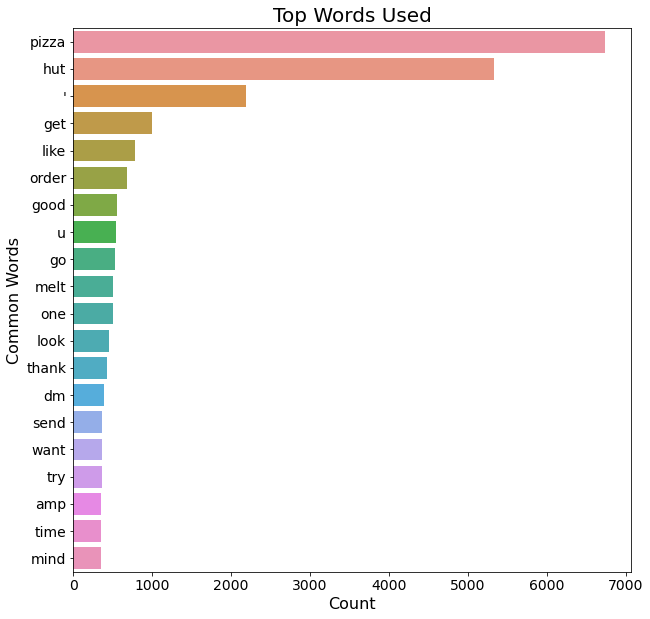

In [50]:
plt.figure(figsize=(10,10))

sns.barplot(y='Common_words', x='count', data=temp)

plt.title("Top Words Used", fontsize=20)
plt.xlabel("Count", fontsize=16)
plt.ylabel("Common Words", fontsize=16)
plt.xticks(fontsize=14); #';' is used to suppress text output describing xticks
plt.yticks(fontsize=14); #';' is used to suppress text output describing yticks

#### Creating Separate Data Frames for each Sentiment

In [51]:
Positive_tweets = df[df['sentiment']=='positive']
Negative_tweets = df[df['sentiment']=='negative']
Neutral_tweets = df[df['sentiment']=='neutral']

### 4.1.2. Top Positive Words Used

In [52]:
top = Counter([item for sublist in Positive_tweets['tweet_tokens'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,pizza,2761
1,hut,2113
2,',1122
3,like,612
4,good,490
5,get,467
6,thank,420
7,u,393
8,dm,327
9,look,313


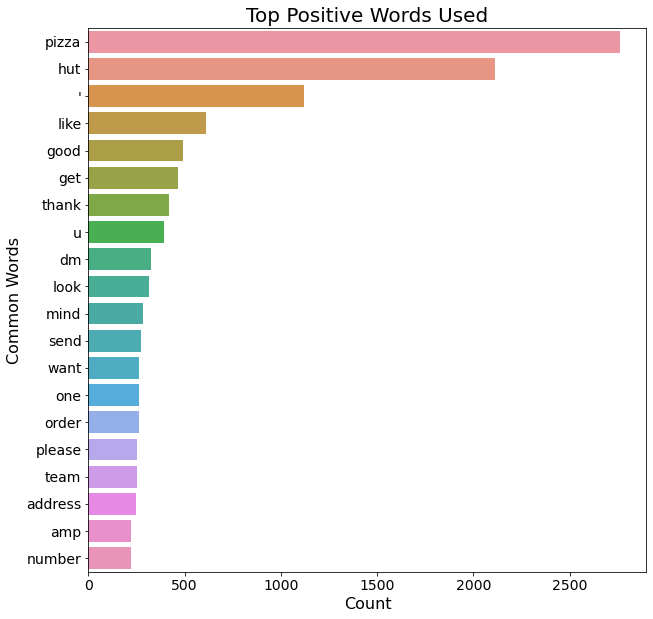

In [53]:
plt.figure(figsize=(10,10))

sns.barplot(y='Common_words', x='count', data=temp_positive)

plt.title("Top Positive Words Used", fontsize=20)
plt.xlabel("Count", fontsize=16)
plt.ylabel("Common Words", fontsize=16)
plt.xticks(fontsize=14); #';' is used to suppress text output describing xticks
plt.yticks(fontsize=14); #';' is used to suppress text output describing yticks

### 4.1.3. Top Negative Words Used

In [54]:
top = Counter([item for sublist in Negative_tweets['tweet_tokens'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
0,pizza,1507
1,hut,1135
2,',520
3,order,276
4,get,268
5,like,150
6,go,150
7,one,132
8,shit,106
9,eat,104


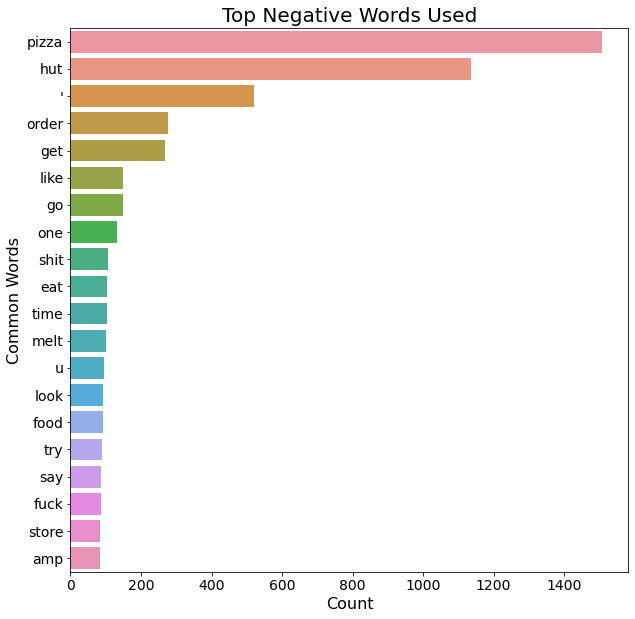

In [55]:
plt.figure(figsize=(10,10))

sns.barplot(y='Common_words', x='count', data=temp_negative)

plt.title("Top Negative Words Used", fontsize=20)
plt.xlabel("Count", fontsize=16)
plt.ylabel("Common Words", fontsize=16)
plt.xticks(fontsize=14); #';' is used to suppress text output describing xticks
plt.yticks(fontsize=14); #';' is used to suppress text output describing yticks

### 4.1.4. Top Neutral Words Used

In [56]:
top = Counter([item for sublist in Neutral_tweets['tweet_tokens'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Purples')

,Common_words,count
0,pizza,2464
1,hut,2084
2,',551
3,get,266
4,melt,192
5,go,160
6,taco,153
7,order,148
8,bell,130
9,try,119


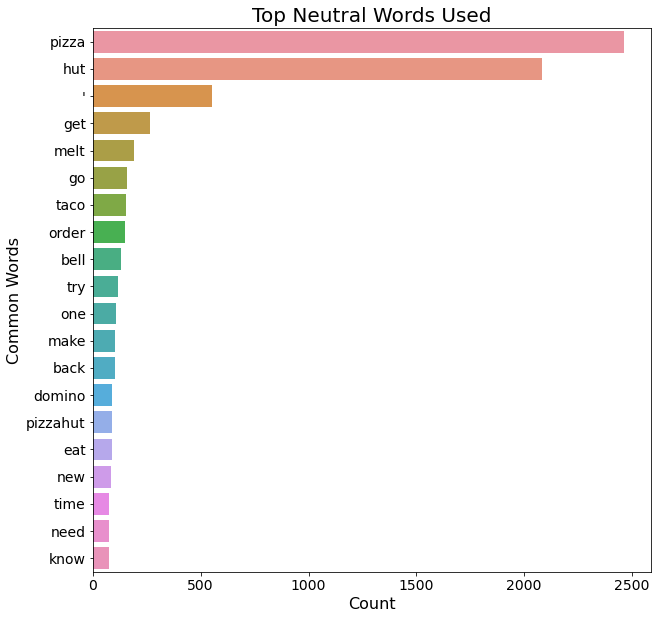

In [57]:
plt.figure(figsize=(10,10))

sns.barplot(y='Common_words', x='count', data=temp_neutral)

plt.title("Top Neutral Words Used", fontsize=20)
plt.xlabel("Count", fontsize=16)
plt.ylabel("Common Words", fontsize=16)
plt.xticks(fontsize=14); #';' is used to suppress text output describing xticks
plt.yticks(fontsize=14); #';' is used to suppress text output describing yticks

### 4.1.5. Count of Tweets based on Sentiment

It is seen that there is a total of 3,784 positive tweets, 3,140 neutral tweets and 1,835 negative tweets about Pizza Hut.

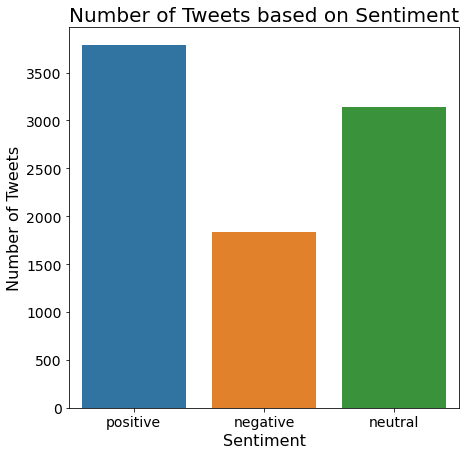

In [58]:
plt.figure(figsize=(7,7))

sns.countplot(x='sentiment', data=df)

plt.title("Number of Tweets based on Sentiment", fontsize=20)
plt.xlabel("Sentiment", fontsize=16)
plt.ylabel("Number of Tweets", fontsize=16)
plt.xticks(fontsize=14); #';' is used to suppress text output describing xticks
plt.yticks(fontsize=14); #';' is used to suppress text output describing yticks

### 4.1.6. Proportional Distribution of Tweets based on Sentiment

The visualisation portrays the proportional distribution of tweets comprising of 43.2% positive tweets, 35.8% neutral tweets and 20.9% negative tweets.

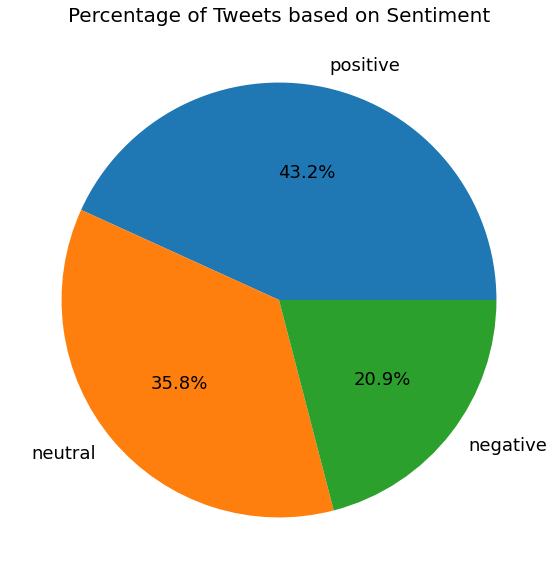

In [59]:
plt.figure(figsize=(10,10))

plt.pie(df['sentiment'].value_counts(),
        labels=df['sentiment'].value_counts().index,
        autopct="%0.1f%%",
        textprops={'fontsize':18})

plt.title("Percentage of Tweets based on Sentiment", fontsize=20);

## 4.2. Bivariate Analysis

### 4.2.1. Distribution of Tweets based on Date and Sentiment

It can be seen that 4th, 5th and 6th November 2022 recorded the top three highest number of tweets regarding Pizza Hut. This is possibly due to a greater number of people ordering pizza on weekends. This hypothesis is proven by Figure 9 since 4th, 5th and 6th November 2022 are Friday, Saturday and Sunday, respectively. Hence, there are more number of tweets on days with more orders.

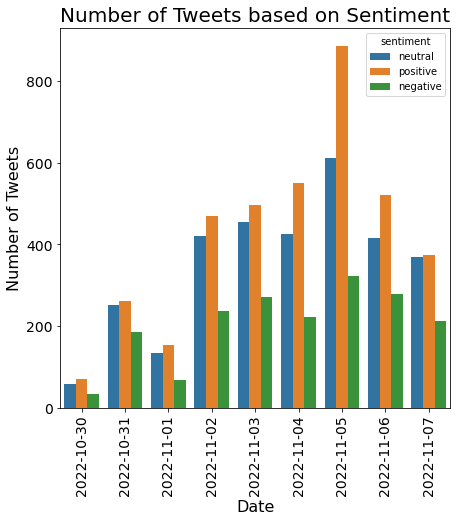

In [60]:
plt.figure(figsize=(7,7))

temp = pd.DataFrame()
temp['date'] = df['date'].dt.date
temp['sentiment'] = df['sentiment']
temp = temp.sort_values(by='date')

sns.countplot(x='date', hue='sentiment', data=temp)

plt.title("Number of Tweets based on Sentiment", fontsize=20)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Number of Tweets", fontsize=16)
plt.xticks(rotation=90, fontsize=14); #';' is used to suppress text output describing xticks
plt.yticks(fontsize=14); #';' is used to suppress text output describing yticks

### 4.2.2. Distribution of Tweets based on Token Count

From the graph, it can be seen that on an average, all sentiments usually have approximately five tokens in their tweets.

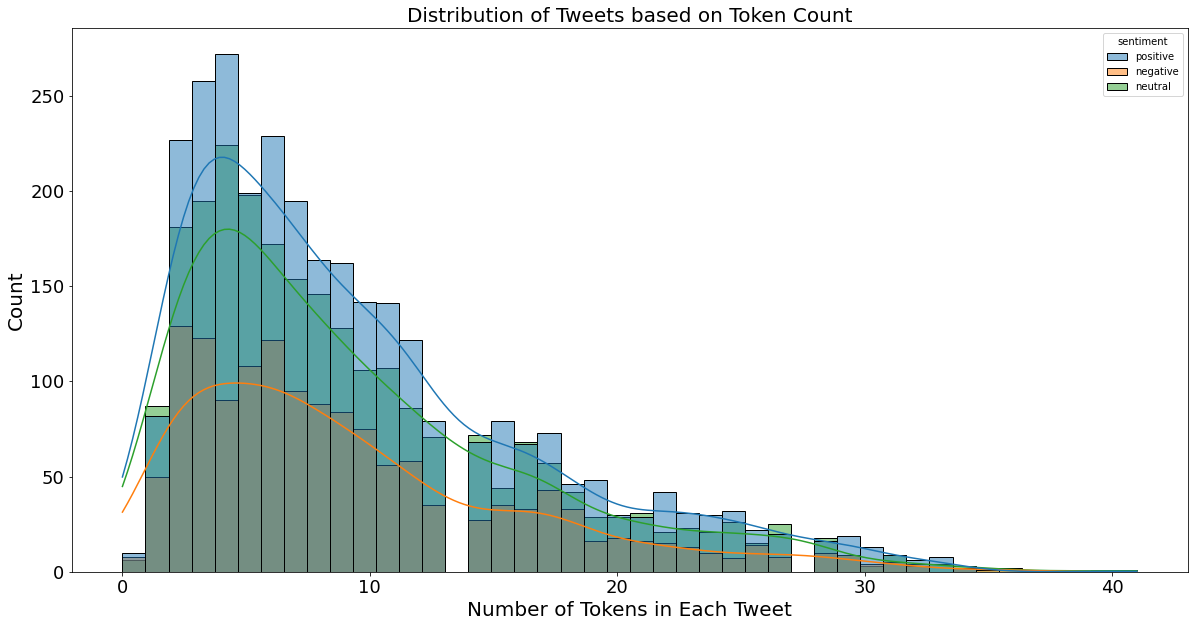

In [61]:
plt.figure(figsize=(20,10))

temp = pd.DataFrame()
temp['sentiment'] = df['sentiment']
temp['token_count'] = pd.Series([len(item) for item in df['tweet_tokens']])

sns.histplot(x='token_count', data=temp, fill=True, hue='sentiment', kde=True)

plt.title("Distribution of Tweets based on Token Count", fontsize=20)
plt.xlabel("Number of Tokens in Each Tweet", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);

# 5. Data Modelling

The feature was set to the cleaned tweets generated and the target variable was set to the label column. The data set was then split into training and testing sets with 80% as training data and 20% as testing data. Feature engineering was performed to convert the tokens and bigrams into a Term Frequency – Inverse Document Frequency (TF-IDF) matrix to facilitate in the training process.

Once the data was ready for modelling, stratified K-fold cross-validation was performed with five folds. Stratified K-fold cross-validation was chosen as it is better for imbalanced data sets since it ensures equal representation of all classes across each fold. Further, hyperparameter tuning was performed for the random forest classifier and the linear SVC. The random forest classifier’s number of trees were set to the values 100, 150, 200, 250 and 300. Similarly, the linear SVC’s hyperparameter C was set to values 0.01, 0.1, 1, 10 and 100.

In [62]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,link,retweet,video,reply_to,label,sentiment,month,year,tweet_tokens,clean_tweet
0,1586870197633355776,1584545256124678150,2022-10-31 10:58:32 AEDT,2022-10-31,10:58:32,1100,125714664,joshuartaylor,Josh - JRT3D - The Recreator3D @ #ERRF2022,"@pizzahut Fine pizza 🍕 hut, twist my arm…I’m c...",...,https://twitter.com/joshuartaylor/status/15868...,False,0,"[{'screen_name': 'pizzahut', 'name': 'Pizza Hu...",1,positive,10,2022,"[fine, pizza, hut, twist, arm, come, tomorrow,...",fine pizza hut twist arm come tomorrow jrt tas...
1,1586869650922606597,1586863727139328002,2022-10-31 10:56:22 AEDT,2022-10-31,10:56:22,1100,40337433,mrcoachcie,CoachCie ➐,Pickup was done at 6:50. @pizzahut I’m very di...,...,https://twitter.com/MrCoachCie/status/15868696...,False,0,[],-1,negative,10,2022,"[pickup, do, disappoint, fix, make, add]",pickup do disappoint fix make add
2,1586869524095066113,1586843908880748545,2022-10-31 10:55:51 AEDT,2022-10-31,10:55:51,1100,1420653958608035840,zrelle_,ᴢ.ʀᴇʟʟᴇ • ᴄʏʙᴏʀɢ ᴠᴛᴜʙᴇʀ 🚀👾,@H4WAIIANP1ZZ4 Bro call pizza hut for me,...,https://twitter.com/zrelle_/status/15868695240...,False,0,"[{'screen_name': 'H4WAIIANP1ZZ4', 'name': 'HAW...",0,neutral,10,2022,"[bro, call, pizza, hut]",bro call pizza hut
3,1586869284751409153,1586869284751409153,2022-10-31 10:54:54 AEDT,2022-10-31,10:54:54,1100,3140330597,eastla1018,ZCHICKEN,Damn we need a pizza hut on the east,...,https://twitter.com/EastLA1018/status/15868692...,False,0,[],-1,negative,10,2022,"[damn, need, pizza, hut, east]",damn need pizza hut east
4,1586868669245784066,1586868669245784066,2022-10-31 10:52:27 AEDT,2022-10-31,10:52:27,1100,1070029573541236741,pleiades1222,bird & invertebrate fan𓅩,every time i eat a pizza hut breadstick God sm...,...,https://twitter.com/pleiades1222/status/158686...,False,0,[],1,positive,10,2022,"[every, time, eat, pizza, hut, breadstick, god...",every time eat pizza hut breadstick god smile


## 5.1. Feature Engineering

In [63]:
# Selecting Feature and Target
X = df['clean_tweet']
y = df['label']

# Train-Test Split to have 80% training data and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [64]:
print("\nData Partitioning:\n")
print("Training Data Size: ", X_train.shape)
print("Testing Data Size: ", X_test.shape)


Data Partitioning:

Training Data Size:  (7007,)
Testing Data Size:  (1752,)


In [65]:
# Vectorise the feature
vectorizer = TfidfVectorizer(min_df=3,sublinear_tf=True,encoding="latin-1", ngram_range=(1,2),
                             stop_words='english')

In [66]:
X_train_tf= vectorizer.fit_transform(X_train.reset_index()["clean_tweet"]).toarray()
X_test_tf = vectorizer.transform(X_test.reset_index()["clean_tweet"]).toarray()

In [67]:
X_train_tf.shape

(7007, 4130)

In [68]:
X_train_tf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [69]:
# Displaying feature names
feature_names = vectorizer.get_feature_names()
feature_names

['ab',
 'abandon',
 'ability',
 'able',
 'able contact',
 'able pay',
 'absolute',
 'absolutely',
 'absolutely homeless',
 'absurd',
 'accept',
 'accept gift',
 'accept pizza',
 'accept redeem',
 'access',
 'accidentally',
 'account',
 'account relate',
 'acknowledge',
 'acoty',
 'act',
 'act class',
 'act like',
 'action',
 'actual',
 'actual pizza',
 'actually',
 'actually good',
 'actually pizza',
 'ad',
 'ad campaign',
 'ad look',
 'ad new',
 'ad pizza',
 'ad work',
 'add',
 'addition',
 'additional',
 'address',
 'address look',
 'address phone',
 'address private',
 'address store',
 'admit',
 'adult',
 'advertise',
 'advertise twitter',
 'advertisement',
 'advertiser',
 'aesthetic',
 'af',
 'afford',
 'afraid',
 'afraid able',
 'africa',
 'afternoon',
 'afternoon thank',
 'age',
 'ago',
 'ago check',
 'agree',
 'agree pizza',
 'agreement',
 'ah',
 'ahead',
 'ahead time',
 'ahhh',
 'aint',
 'air',
 'airport',
 'aka',
 'al',
 'album',
 'ale',
 'ale spirit',
 'alert',
 'alexis',
 '

## 5.2. Stratified K-fold Cross-Validation (K=5)

In [70]:
from sklearn.model_selection import StratifiedKFold

skfCV5 = StratifiedKFold(n_splits=5)

# Creating a Pandas Dataframe to store the results of
# all the cross-validations

skfCVResults = {'Model':[],
                'Number_of_Folds':[],
                'Fold_Number':[],
                'Accuracy':[],
                'Precision':[],
                'Recall':[],
                'F1_Score':[]}

# Initialising the Dataframe
skfCVResultsDataframe = pd.DataFrame(skfCVResults)

skfCVResultsDataframe

,Model,Number_of_Folds,Fold_Number,Accuracy,Precision,Recall,F1_Score


In [71]:
def calculate_performance(model_name, foldNumber, vlData_y, y_pred):

    print("\nConfusion Matrix for ", model_name, " model")
    print(confusion_matrix(vlData_y, y_pred))
    
    print("\nClassification Report for ", model_name, " model")
    print(classification_report(vlData_y, y_pred, target_names=['negative', 'neutral', 'positive']))
    
    accuracy = accuracy_score(vlData_y, y_pred)
    precision = precision_score(vlData_y, y_pred, average='macro')
    recall = recall_score(vlData_y, y_pred, average='macro')
    f1Score = f1_score(vlData_y, y_pred, average='macro')

    # Appending iteration details to the cross-validation results dataframe
    newRow = {'Model': model_name,
              'Number_of_Folds': 5,
              'Fold_Number': foldNumber,
              'Accuracy': accuracy,
              'Precision': precision,
              'Recall': recall,
              'F1_Score': f1Score}
    
    return newRow

In [72]:
# Creating Numpy arrays to facilitate easy processing
y_train_array = y_train.to_numpy()
y_test_array = y_test.to_numpy()

In [73]:
print("Stratified 5-fold Cross Validation")

foldNumber = 0

for train_index, test_index in skfCV5.split(X_train_tf, y_train_array):
    
    # Printing Fold Information
    foldNumber = foldNumber + 1
    print (60*"-") # Prints a line of hyphens for presentation purposes
    print("Fold number:", foldNumber)
    print (60*"-")
    
    # Printing trData and vlData
    trData_X = X_train_tf[train_index]
    trData_y = y_train_array[train_index]
    vlData_X = X_train_tf[test_index]
    vlData_y = y_train_array[test_index]

    # Perform Cross-Validation on different Models
    # Logistic Regression
    model = LogisticRegression(random_state=0)
    model.fit(trData_X, trData_y)
    y_pred = model.predict(vlData_X)
    
    newRow = calculate_performance('Logistic Regression', foldNumber, vlData_y, y_pred)
    skfCVResultsDataframe = skfCVResultsDataframe.append(newRow, ignore_index=True)
    
    # Random Forest Classifier
    for value in range(100, 301, 50):
        model = RandomForestClassifier(n_estimators=value, random_state=0)
        model.fit(trData_X, trData_y)
        y_pred = model.predict(vlData_X)

        model_name = 'Random Forest Classifier (trees='+str(value)+')'
        newRow = calculate_performance(model_name, foldNumber, vlData_y, y_pred)
        skfCVResultsDataframe = skfCVResultsDataframe.append(newRow, ignore_index=True)
        
    # Linear SVC
    for value in [0.01, 0.1, 1, 10, 100]:
        model = LinearSVC(C=value, random_state=0)
        model.fit(trData_X, trData_y)
        y_pred = model.predict(vlData_X)

        model_name = 'Linear SVC (C='+str(value)+')'
        newRow = calculate_performance(model_name, foldNumber, vlData_y, y_pred)
        skfCVResultsDataframe = skfCVResultsDataframe.append(newRow, ignore_index=True)

    # Multinomial Naive Bayes
    model = MultinomialNB()
    model.fit(trData_X, trData_y)
    y_pred = model.predict(vlData_X)
    
    newRow = calculate_performance('Multinomial NB', foldNumber, vlData_y, y_pred)
    skfCVResultsDataframe = skfCVResultsDataframe.append(newRow, ignore_index=True)

Stratified 5-fold Cross Validation
------------------------------------------------------------
Fold number: 1
------------------------------------------------------------

Confusion Matrix for  Logistic Regression  model
[[136  86  70]
 [ 16 444  43]
 [ 20  60 527]]

Classification Report for  Logistic Regression  model
              precision    recall  f1-score   support

    negative       0.79      0.47      0.59       292
     neutral       0.75      0.88      0.81       503
    positive       0.82      0.87      0.85       607

    accuracy                           0.79      1402
   macro avg       0.79      0.74      0.75      1402
weighted avg       0.79      0.79      0.78      1402


Confusion Matrix for  Random Forest Classifier (trees=100)  model
[[115 107  70]
 [ 14 461  28]
 [ 15  88 504]]

Classification Report for  Random Forest Classifier (trees=100)  model
              precision    recall  f1-score   support

    negative       0.80      0.39      0.53       292
  


Confusion Matrix for  Random Forest Classifier (trees=200)  model
[[132  98  62]
 [ 19 455  29]
 [ 19  99 489]]

Classification Report for  Random Forest Classifier (trees=200)  model
              precision    recall  f1-score   support

    negative       0.78      0.45      0.57       292
     neutral       0.70      0.90      0.79       503
    positive       0.84      0.81      0.82       607

    accuracy                           0.77      1402
   macro avg       0.77      0.72      0.73      1402
weighted avg       0.78      0.77      0.76      1402


Confusion Matrix for  Random Forest Classifier (trees=250)  model
[[131  97  64]
 [ 16 458  29]
 [ 18  98 491]]

Classification Report for  Random Forest Classifier (trees=250)  model
              precision    recall  f1-score   support

    negative       0.79      0.45      0.57       292
     neutral       0.70      0.91      0.79       503
    positive       0.84      0.81      0.82       607

    accuracy                   


Confusion Matrix for  Linear SVC (C=0.1)  model
[[126 102  63]
 [ 14 451  38]
 [ 27  72 508]]

Classification Report for  Linear SVC (C=0.1)  model
              precision    recall  f1-score   support

    negative       0.75      0.43      0.55       291
     neutral       0.72      0.90      0.80       503
    positive       0.83      0.84      0.84       607

    accuracy                           0.77      1401
   macro avg       0.77      0.72      0.73      1401
weighted avg       0.78      0.77      0.76      1401


Confusion Matrix for  Linear SVC (C=1)  model
[[170  73  48]
 [ 44 421  38]
 [ 48  56 503]]

Classification Report for  Linear SVC (C=1)  model
              precision    recall  f1-score   support

    negative       0.65      0.58      0.61       291
     neutral       0.77      0.84      0.80       503
    positive       0.85      0.83      0.84       607

    accuracy                           0.78      1401
   macro avg       0.76      0.75      0.75      1401


Confusion Matrix for  Linear SVC (C=100)  model
[[170  61  60]
 [ 59 381  64]
 [ 64  78 464]]

Classification Report for  Linear SVC (C=100)  model
              precision    recall  f1-score   support

    negative       0.58      0.58      0.58       291
     neutral       0.73      0.76      0.74       504
    positive       0.79      0.77      0.78       606

    accuracy                           0.72      1401
   macro avg       0.70      0.70      0.70      1401
weighted avg       0.73      0.72      0.72      1401


Confusion Matrix for  Multinomial NB  model
[[116  86  89]
 [ 13 379 112]
 [ 19  90 497]]

Classification Report for  Multinomial NB  model
              precision    recall  f1-score   support

    negative       0.78      0.40      0.53       291
     neutral       0.68      0.75      0.72       504
    positive       0.71      0.82      0.76       606

    accuracy                           0.71      1401
   macro avg       0.73      0.66      0.67      1401
wei

In [74]:
skfCVResultsDataframe

,Model,Number_of_Folds,Fold_Number,Accuracy,Precision,Recall,F1_Score
0,Logistic Regression,5.0,1.0,0.789586,0.788893,0.738887,0.747959
1,Random Forest Classifier (trees=100),5.0,1.0,0.770328,0.779521,0.713550,0.718928
2,Random Forest Classifier (trees=150),5.0,1.0,0.764622,0.767627,0.711097,0.716998
3,Random Forest Classifier (trees=200),5.0,1.0,0.761769,0.770423,0.706279,0.711820
4,Random Forest Classifier (trees=250),5.0,1.0,0.766762,0.775936,0.711421,0.717464
5,Random Forest Classifier (trees=300),5.0,1.0,0.766049,0.774051,0.710872,0.716738
6,Linear SVC (C=0.01),5.0,1.0,0.600571,0.712877,0.501940,0.460462
7,Linear SVC (C=0.1),5.0,1.0,0.778174,0.780519,0.721328,0.728818
8,Linear SVC (C=1),5.0,1.0,0.789586,0.775276,0.751905,0.759181
9,Linear SVC (C=10),5.0,1.0,0.746790,0.722839,0.714276,0.717731


In [75]:
# The cross-validation results are given in skfCVFinalResult
skfCVFinalResult = skfCVResultsDataframe.groupby(['Model'])['Accuracy','Precision','Recall','F1_Score'].mean()
skfCVFinalResult

,Accuracy,Precision,Recall,F1_Score
Model,,,,
Linear SVC (C=0.01),0.608106,0.723917,0.506432,0.459852
Linear SVC (C=0.1),0.773653,0.779282,0.720722,0.728947
Linear SVC (C=1),0.787926,0.772624,0.755784,0.760931
Linear SVC (C=10),0.751107,0.727449,0.723159,0.724789
Linear SVC (C=100),0.725275,0.700774,0.699643,0.700004
Logistic Regression,0.783215,0.781355,0.736225,0.744747
Multinomial NB,0.706865,0.724901,0.654781,0.665796
Random Forest Classifier (trees=100),0.761237,0.761932,0.708517,0.713659
Random Forest Classifier (trees=150),0.761094,0.760794,0.709055,0.714378


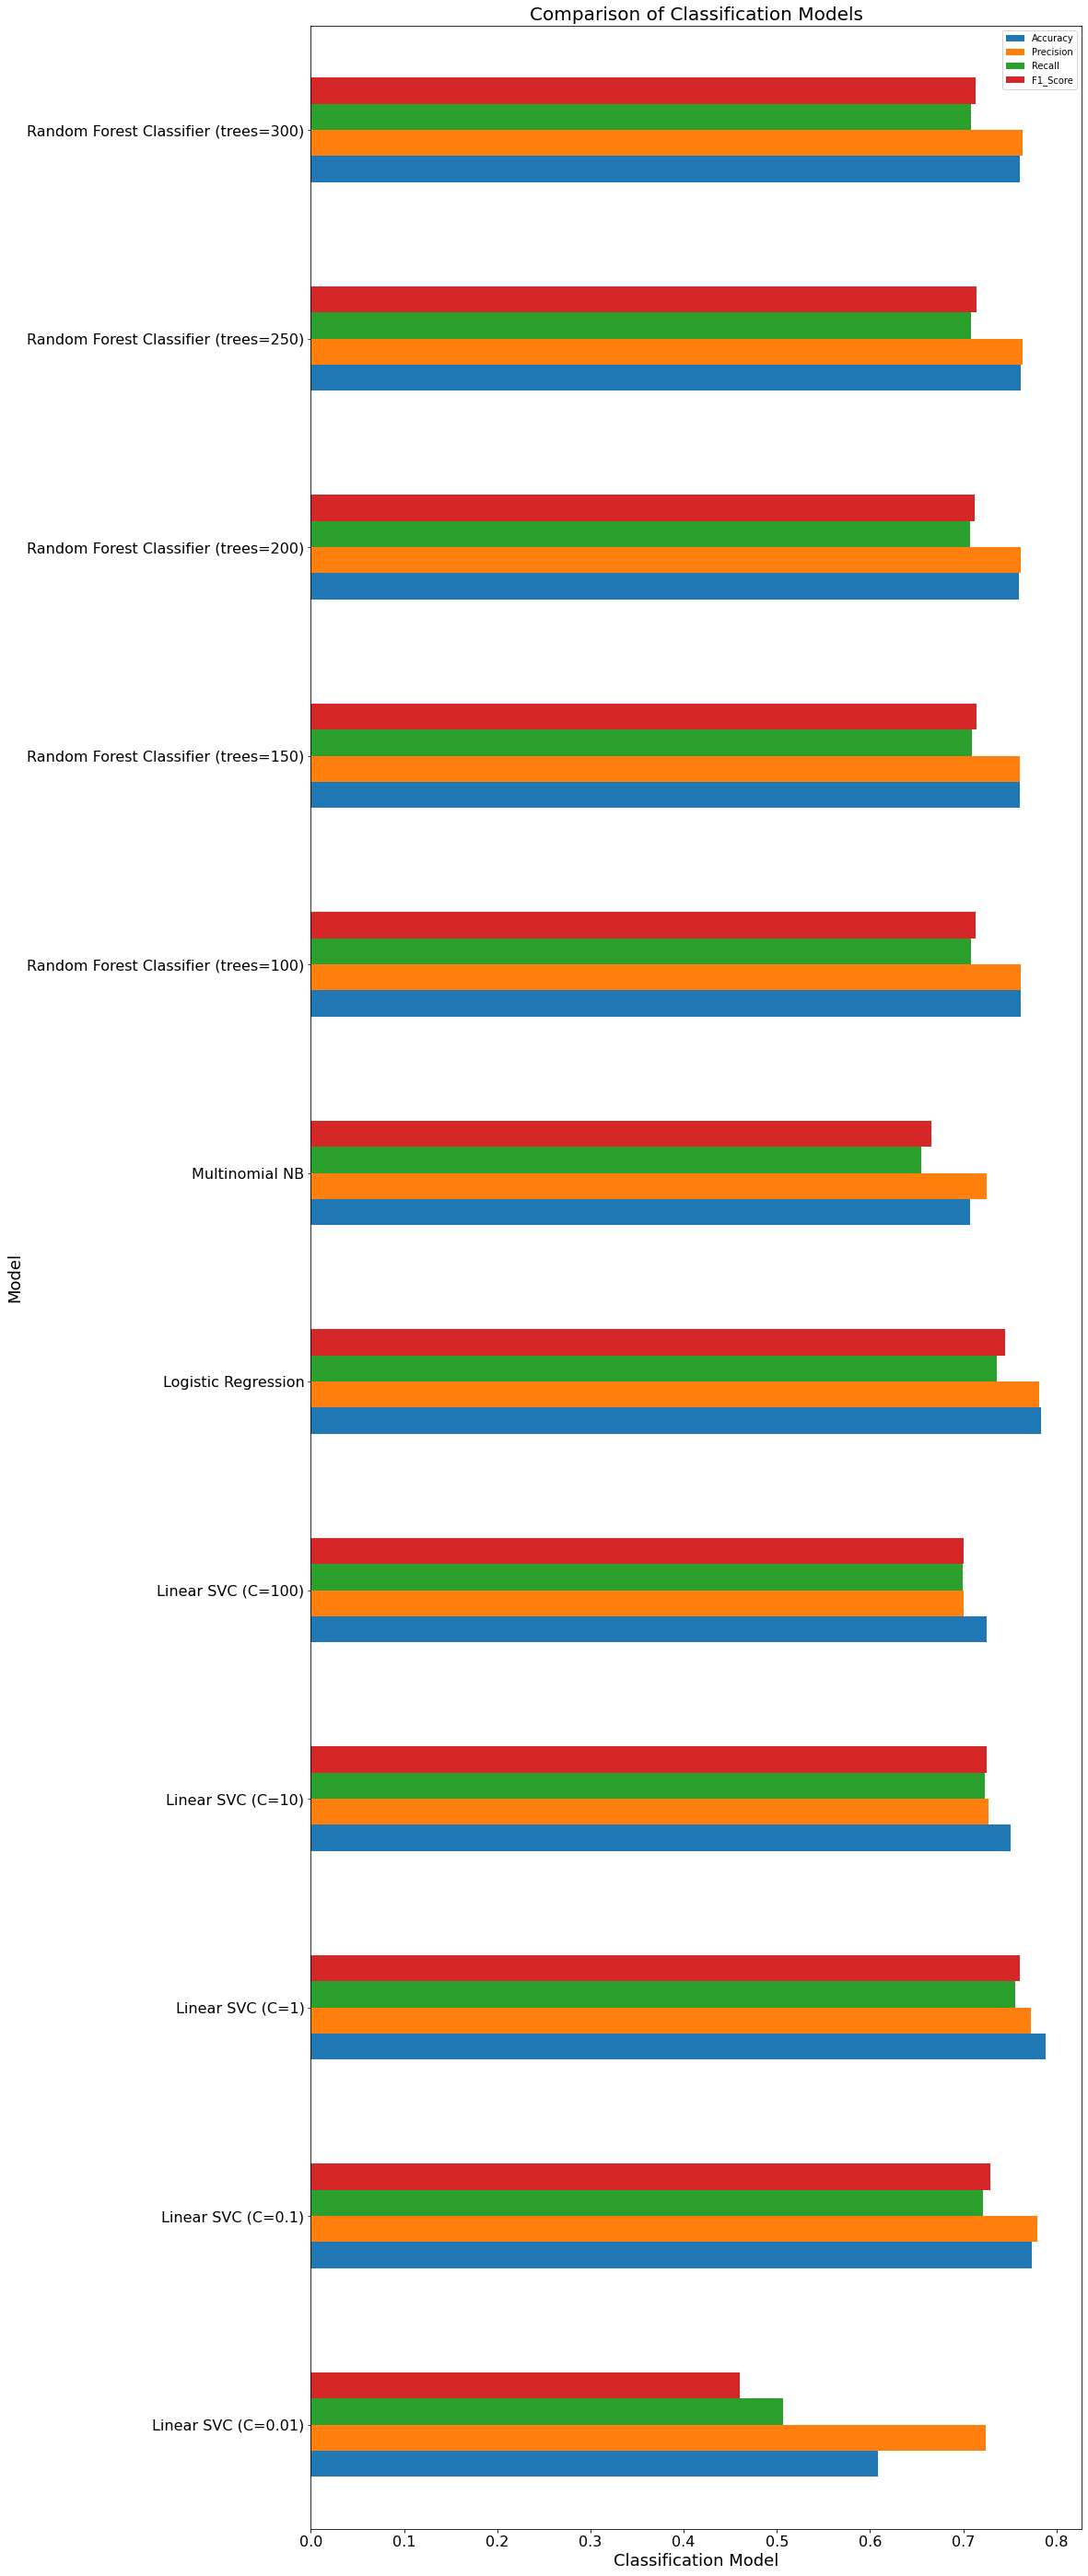

In [76]:
# Graphical Visualisation of Model Comparison

skfCVFinalResult.plot(kind='barh', rot=0, figsize=(15,50))

plt.title("Comparison of Classification Models", fontsize=20)
plt.xlabel("Classification Model", fontsize=18)
plt.ylabel("Model", fontsize=18)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.legend(loc='upper right')

It is observed from the above graph that Linear SVC with hyperparameter C set to the value 1 and Logistic Regression models have the highest mean accuracy, mean precision and mean recall. Hence, the Linear SVC (C=1) and Logistic Regression models will be selected for training and testing using the training and testing sets created earlier. Their performances will be compared using the confusion matrix and classification reports.

## 5.3. Training and Testing

### 5.3.1. Linear SVC (C=1)

In [77]:
svc = LinearSVC(C=1,random_state=0)
svc.fit(X_train_tf, y_train_array)
y_pred = svc.predict(X_test_tf)

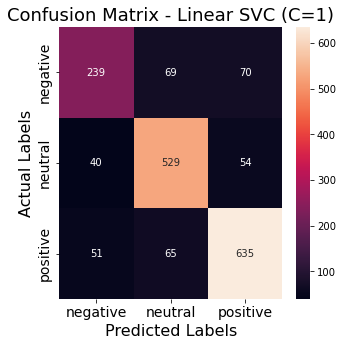

In [78]:
# Confusion Matrix
cf_matrix = confusion_matrix(y_test_array, y_pred)

# Graphical Visualisation
plt.figure(figsize=(5,5))

cf_matrix_heatmap = sns.heatmap(cf_matrix, annot=True, fmt='g')
cf_matrix_heatmap.set_xticklabels(['negative', 'neutral', 'positive'])
cf_matrix_heatmap.set_yticklabels(['negative', 'neutral', 'positive'])

plt.title("Confusion Matrix - Linear SVC (C=1)", fontsize=18)
plt.xlabel("Predicted Labels", fontsize=16)
plt.ylabel("Actual Labels", fontsize=16)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

In [79]:
print("\nClassification Report - Linear SVC (C=1)")
print(classification_report(y_test_array, y_pred, target_names=['negative', 'neutral', 'positive']))


Classification Report - Linear SVC (C=1)
              precision    recall  f1-score   support

    negative       0.72      0.63      0.68       378
     neutral       0.80      0.85      0.82       623
    positive       0.84      0.85      0.84       751

    accuracy                           0.80      1752
   macro avg       0.79      0.78      0.78      1752
weighted avg       0.80      0.80      0.80      1752



### 5.3.2. Logistic Regression

In [80]:
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train_tf, y_train_array)
y_pred = logreg.predict(X_test_tf)

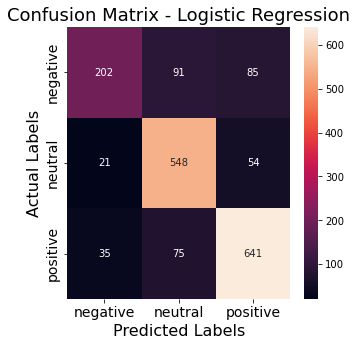

In [81]:
# Confusion Matrix
cf_matrix = confusion_matrix(y_test_array, y_pred)

# Graphical Visualisation
plt.figure(figsize=(5,5))

cf_matrix_heatmap = sns.heatmap(cf_matrix, annot=True, fmt='g')
cf_matrix_heatmap.set_xticklabels(['negative', 'neutral', 'positive'])
cf_matrix_heatmap.set_yticklabels(['negative', 'neutral', 'positive'])

plt.title("Confusion Matrix - Logistic Regression", fontsize=18)
plt.xlabel("Predicted Labels", fontsize=16)
plt.ylabel("Actual Labels", fontsize=16)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

In [82]:
print("\nClassification Report - Logistic Regression")
print(classification_report(y_test_array, y_pred, target_names=['negative', 'neutral', 'positive']))


Classification Report - Logistic Regression
              precision    recall  f1-score   support

    negative       0.78      0.53      0.64       378
     neutral       0.77      0.88      0.82       623
    positive       0.82      0.85      0.84       751

    accuracy                           0.79      1752
   macro avg       0.79      0.76      0.76      1752
weighted avg       0.79      0.79      0.79      1752



By measuring the accuracies of the two models, it can be seen that although their performances are comparable, the Linear SVC (C=1) model is more accurate than the Logistic Regression model.

## 5.4. Verification

To further verify sentiment analysis performed by the Linear SVC (C=1) and Logistic Regression models, two random tweets are selected with their labels. The label predicted by the Linear SVC (C=1) and Logistic Regression models is given.

### 5.4.1. Neutral Sentiment Tweet

In [83]:
tweet = df.iloc[100]['tweet']
tweet

'I wanna go on a movie date 🥴😩 the ones that have flowers in the front seat when I’m picked up , snacks from the dollar store, a blanket , &amp; a little personal pan pizza meal from Pizza Hut \U0001f979\U0001f979'

In [84]:
df.iloc[100]['label']

0

In [85]:
vector = vectorizer.transform([tweet])

# Linear SVC prediction
result = svc.predict(vector)
result[0]

0

In [86]:
# Logistic Regression prediction
result = logreg.predict(vector)
result[0]

0

### 5.4.2. Positive Sentiment Tweet

In [87]:
tweet = df.iloc[101]['tweet']
tweet

'@I_am_lynnsane nope, totally new and even better'

In [88]:
df.iloc[101]['label']

1

In [89]:
vector = vectorizer.transform([tweet])

# Linear SVC prediction
result = svc.predict(vector)
result[0]

1

In [90]:
# Logistic Regression prediction
result = logreg.predict(vector)
result[0]

1

# Storing the Model

The Linear SVC (C=1) model is stored as a pickle file for future use.

In [91]:
# Importing Pickle package
import pickle

In [92]:
# Saving the model

modelFile = open('model.pickle', 'wb')
pickle.dump(svc, modelFile)
modelFile.close()

# Conclusion

Twint was used to collect tweets from Twitter containing the keyword ‘Pizza Hut’, which were labelled using VADER. For the data set acquired, different supervised machine learning models were applied on to find out the best performing model.

The Linear SVC (C=1) model has optimum performance while implementing sentiment analysis on the tweets to categorise them as having positive, neutral or negative sentiment. It has an accuracy of 80%.